In [1]:
import glob
import nltk
import spacy
import os
import string
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/dataset')  #don't remove r and give extra space
myFiles = glob.glob('*.txt')
# print(myFiles)  #prints text file names

In [3]:
dict_words={}
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
for filename in myFiles:
    # print(filename)
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word 
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    words=list(set(words))
    dict_words[filename]=words
    words=[]
    file.close()

#print(dict_words)

In [5]:
B = pd.read_csv('C:/Users/S K Nayak/Documents/CSE2002 - TOC/DA/TOC_Assignment/BlacklistedFile1.csv')
#print(B)

value=B['Index'].tolist()
key=B['Sensitivity'].tolist()

#print(value)
#print(key)

In [6]:
Ref_dict=dict(zip(value,key))
#print(Ref_dict)      #Data Dictionary


# Clustering
less_sensitive=[]
avg_sensitive=[]
high_sensitive=[]

for name, words in dict_words.items():
    max=0
    for x in words:
        if(max==3):
            break
        for value, key in Ref_dict.items():
            if(x==value):
                if(max<key):
                    max=int(key)
                if(max==3):
                    print(name,"has High Senstive data")
                    high_sensitive.append(name)
                    break
    if(max==0):
        print(name,"has No Sensitive data")
    if(max==1):
        print(name,"has Less Sensitive data")
        less_sensitive.append(name)
    if(max==2):
        print(name,"has Average Sensitive data")
        avg_sensitive.append(name)
                
print()
print("CLUSTER LESS-SENSITIVE:",less_sensitive)
print("CLUSTER AVG-SENSITIVE:",avg_sensitive)
print("CLUSTER HIGH-SENSITIVE:",high_sensitive)

001-2015beyondobamanewcongressneed.txt has High Senstive data
002-2015willamericacontinueitsslow.txt has High Senstive data
003-2015willnewcongressgetseriousa.txt has High Senstive data
004-300poundsjobreferenceexploitat.txt has No Sensitive data
005-actorartistphilanthropistmymot.txt has Average Sensitive data
006-afghanistanatcrucialjuncture.txt has High Senstive data
007-afghanistanconferencewonrock.txt has High Senstive data
008-afghanistanreadydrawdown.txt has High Senstive data
009-aftercharliehebdoattackisla.txt has High Senstive data
010-americanevertortureagainlawsci.txt has Average Sensitive data
011-amnesiaimmigrationeuropelesson.txt has Average Sensitive data
012-anotherclimatechangesummitd.txt has High Senstive data
013-anxiousbritainsuccourtvleadere.txt has Average Sensitive data
014-areelectedlnpwithoutcampbellne.txt has Average Sensitive data
015-areyoudrinkingbecauseyourework.txt has High Senstive data
016-argentinadebtcrisiscountryturn.txt has Less Sensitive data
017-

124.txt has High Senstive data
125-irannotsounlikelyally.txt has High Senstive data
125.txt has High Senstive data
126-iransanctionsfightthreemythsno.txt has High Senstive data
126.txt has High Senstive data
127-irantalksnucleargenevaus.txt has High Senstive data
127.txt has Average Sensitive data
128-islamiccivilisationeuropecart.txt has High Senstive data
128.txt has High Senstive data
129-islamicterrorandobamawhitehous.txt has High Senstive data
129.txt has High Senstive data
13.txt has High Senstive data
130-isurvivedbhopalgastragedy.txt has Average Sensitive data
130.txt has High Senstive data
131-itgoinggetworsefrenchmuslims.txt has High Senstive data
131.txt has High Senstive data
132-itnottimedismantlecia.txt has High Senstive data
132.txt has High Senstive data
133-itpatriotismstupidwhatliberalc.txt has Average Sensitive data
133.txt has High Senstive data
134-itstimetoadoptalcoholicsanonym.txt has High Senstive data
134.txt has High Senstive data
135-itusedtoberudenottoanswer

224-revisitingbritishconquestje.txt has Average Sensitive data
225-risepolandurbanmovement.txt has Less Sensitive data
226-russiaarcticopportunity.txt has Average Sensitive data
227-russiacaucasusgeorgiaarmeni.txt has Average Sensitive data
228-russianbankfrenchnationali.txt has Less Sensitive data
229-russiaoverstretchingitself.txt has Average Sensitive data
230-russiapartsolutionproblem.txt has High Senstive data
231-salutingsilentheroesusnavyssub.txt has High Senstive data
232-saudiarabiaanxiousideologicall.txt has High Senstive data
233-saudiboldpoliticalgambit.txt has High Senstive data
234-schoolislamicvocabularylessonp.txt has Average Sensitive data
235-selmasetsoffnewfightovermartin.txt has High Senstive data
236-sevenwaystostaymarried.txt has Less Sensitive data
237-sextingporngaymenrusselltdavie.txt has High Senstive data
238-sexworkershumanrights.txt has High Senstive data
239-siavideopopmusicnotpaedophilia.txt has High Senstive data
24.txt has High Senstive data
240-singler

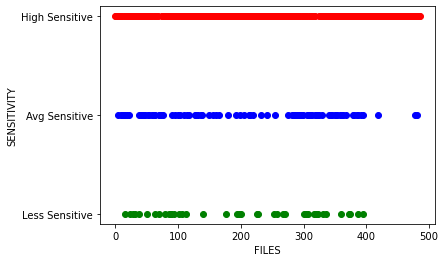

In [7]:
x=[i for i in range(len(myFiles))]
y=[]
for i in x:
    if(myFiles[i] in less_sensitive):
        y.append(1)
    elif(myFiles[i] in avg_sensitive):
        y.append(2)
    elif(myFiles[i] in high_sensitive):
        y.append(3)
    else:
        y.append(None)
plt.yticks([1,2,3],["Less Sensitive","Avg Sensitive","High Sensitive"])
# plt.xticks(rotation=45, ha='right')
plt.ylabel("SENSITIVITY")
plt.xlabel("FILES")
for i in range(0,len(x)):
    if(y[i]==3):
        plt.scatter(x[i],y[i],color="red")
    if(y[i]==2):
        plt.scatter(x[i],y[i],color="blue")
    if(y[i]==1):
        plt.scatter(x[i],y[i],color="green")

In [8]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree,tree2conlltags
from pprint import pprint
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\S K Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\S K
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
def preprocess(sent):
    sent = word_tokenize(sent)
    sent = pos_tag(sent)
    return sent

In [10]:
# for filename in high_sensitive:
#     file = open(filename, 'rt', encoding="utf8")
#     text = file.read()
#     sent = preprocess(text)
#     pattern = 'NP: {<DT>?<JJ>*<NN>}'
#     cp = nltk.RegexpParser(pattern)
#     cs = cp.parse(sent)
#     iob_tagged = tree2conlltags(cs)
#     # pprint(iob_tagged)
#     ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
#     doc=nlp(text)
#     # pprint([(X.text, X.label_) for X in doc.ents])
#     # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
#     len(doc.ents)
#     labels = [x.label_ for x in doc.ents]
#     Counter(labels)
#     items = [x.text for x in doc.ents]
#     print(Counter(items).most_common(3))
    
#     sentences = [x for x in doc.sents]
#     ttemp = len(sentences) - 1
#     displacy.render(nlp(str(sentences[ttemp])),jupyter=True, style='ent')
#     displacy.render(nlp(str(sentences[ttemp])), style='dep', jupyter = True, options = {'distance': 120})
    
#     [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[ttemp])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
#     dict([(str(x), x.label_) for x in nlp(str(sentences[ttemp])).ents])
#     print([(x, x.ent_iob_, x.ent_type_) for x in sentences[ttemp]])
#     file.close()

In [11]:
# for filename in avg_sensitive:
#     file = open(filename, 'rt', encoding="utf8")
#     text = file.read()
#     sent = preprocess(text)
#     pattern = 'NP: {<DT>?<JJ>*<NN>}'
#     cp = nltk.RegexpParser(pattern)
#     cs = cp.parse(sent)
#     iob_tagged = tree2conlltags(cs)
#     # pprint(iob_tagged)
#     ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
#     doc=nlp(text)
#     # pprint([(X.text, X.label_) for X in doc.ents])
#     # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
#     len(doc.ents)
#     labels = [x.label_ for x in doc.ents]
#     Counter(labels)
#     items = [x.text for x in doc.ents]
#     print(Counter(items).most_common(3))
    
#     sentences = [x for x in doc.sents]
#     temp = len(sentences) - 1
#     displacy.render(nlp(str(sentences[temp])),jupyter=True, style='ent')
#     displacy.render(nlp(str(sentences[temp])), style='dep', jupyter = True, options = {'distance': 120})
    
#     [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[temp])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
#     dict([(str(x), x.label_) for x in nlp(str(sentences[temp])).ents])
#     print([(x, x.ent_iob_, x.ent_type_) for x in sentences[temp]])
#     file.close()

In [12]:
# for filename in less_sensitive:
#     file = open(filename, 'rt', encoding="utf8")
#     text = file.read()
#     sent = preprocess(text)
#     pattern = 'NP: {<DT>?<JJ>*<NN>}'
#     cp = nltk.RegexpParser(pattern)
#     cs = cp.parse(sent)
#     iob_tagged = tree2conlltags(cs)
#     # pprint(iob_tagged)
#     ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
#     doc=nlp(text)
#     # pprint([(X.text, X.label_) for X in doc.ents])
#     # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
#     len(doc.ents)
#     labels = [x.label_ for x in doc.ents]
#     Counter(labels)
#     items = [x.text for x in doc.ents]
#     print(Counter(items).most_common(3))
    
#     sentences = [x for x in doc.sents]
#     temp = len(sentences) - 1
#     displacy.render(nlp(str(sentences[temp])),jupyter=True, style='ent')
#     displacy.render(nlp(str(sentences[temp])), style='dep', jupyter = True, options = {'distance': 120})
    
#     [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[temp])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
#     dict([(str(x), x.label_) for x in nlp(str(sentences[temp])).ents])
#     print([(x, x.ent_iob_, x.ent_type_) for x in sentences[temp]])
#     file.close()

In [13]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

np.random.seed(500)

# CYBER SECURITY DICTIONARY

In [14]:
# Define dictionary with related to cyber security and digital forensic domains.
all_terms = ['access control', 'anti-virus', 'anti-malware', 'antivirus software', 'apt', 'advanced persistent threat', 'asset', 
            'authentication', 'authorization', 'backing up', 'bcp', 'business continuity planning', 'behavior monitoring',
            'blacklist', 'block cipher', 'botnet', 'bug', 'byod', 'bring your own device', 'ciphertext', 'clickjacking', 'cloud computing',
            'cnd', 'computer network defense', 'cracker', 'critical infrastructure', 'cve', 'common vulnerabilities and exposures',
            'cryptography', 'cyberattack', 'cyber ecosystem', 'cyberespionage', 'cybersecurity', 'cyber teams', 'data breach',
            'data integrity', 'data mining', 'data theft', 'ddos attack', 'distributed denial of service attack', 'decrypt',
            'digital certificate', 'digital forensics', 'dlp', 'data loss prevention', 'dmz', 'demilitarized zone', 'dos',
            'denial of service', 'drive-by download', 'eavesdropping', 'encode', 'encryption key', 'firewall', 'hacker', 'hacktivism',
            'honeypot', 'iaas', 'infrastructure-as-a-service', 'identity cloning', 'identity fraud', 'ids', 'intrusion detection system',
            'information security policy', 'insider threat', 'ips', 'intrusion prevention system', 'isp', 'internet service provider',
            'jboh', 'javascript-binding-over-http', 'keylogger', 'lan', 'local area network', 'link jacking', 'malware', 'malicious software',
            'outsider threat', 'outsourcing', 'owasp', 'open web application security project', 'paas', 'platform-as-a-service',
            'packet sniffing', 'patch', 'patch management', 'payment card skimmers', 'pen testing', 'phishing', 'pki', 'public key infrastructure',
            'pos intrusions', 'point of sale intrusions', 'ransomware', 'restore', 'risk assessment', 'risk management', 'saas',
            'software-as-a-service', 'sandboxing', 'scada', 'supervisory control and data acquisition', 'security control',
            'security perimeter', 'siem', 'security information and event management', 'sniffing', 'social engineering', 'spam',
            'spear phishing', 'spoof', 'spoofing', 'spyware', 'supply chain', 'threat assessment', 'trojan horse', 'trojan',
            'two-factor authentication', 'two-step authentication', 'unauthorized access', 'vpn', 'virtual private network',
            'virus', 'vishing', 'vulnerability', 'whitelist', 'wi-fi', 'worm', 'zombie']

In [15]:
# Performing dictionary look up on the sentences stored in the dataset containing terms defined in our dictionary.
def process_review(review):
    processed_token = []
    for token in review.split():
        token = ''.join(e.lower() for e in token if e.isalnum())
        processed_token.append(token)
    return ' '.join(processed_token)

def find_terms(text):
    terms = []
    review = process_review(text)
    for token in review.split():
          if token in all_terms:
            terms.append(token) 
    return terms

# PREPROCESSING THE CORPUS

In [16]:
# Lemmatizing the File:Token dictionary
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

preproc = {}

for fil,ls in dict_words.items():
    for i in range(len(ls)):
        ls[i] = lemmatizer.lemmatize(ls[i])
    preproc[fil] = ' '.join(ls)

In [17]:
corpus = pd.DataFrame.from_dict(preproc, orient = 'index')
corpus.reset_index(level = 0, inplace = True)
corpus.columns = ['File', 'TokensLemmas']
corpus['LookUpCBS'] = corpus['TokensLemmas'].apply(find_terms)
corpus['Sensitivity'] = y
# df1 = corpus[corpus.isna().any(axis=1)]
# df1
# corpus.dropna(inplace = True)
corpus

File  \
0    001-2015beyondobamanewcongressneed.txt   
1    002-2015willamericacontinueitsslow.txt   
2    003-2015willnewcongressgetseriousa.txt   
3    004-300poundsjobreferenceexploitat.txt   
4    005-actorartistphilanthropistmymot.txt   
..                                      ...   
481                                cs-5.txt   
482                                cs-6.txt   
483                                cs-7.txt   
484                                cs-8.txt   
485                                cs-9.txt   

                                          TokensLemmas  \
0    history disdain generation market sense materi...   
1    others personal declaration source know modern...   
2    attention know republican republican obama con...   
3    tend market others idea business advertised tr...   
4    philanthropist reminded know mother thing good...   
..                                                 ...   
481  branch strongly maker full responded encourage...   
482  attention actor personal operation entity shut...   
483  brace directive earlier others hacker know shu...   
484  delivering software code alan hire hereford ba...   
485  history coordinated asset henry actually actor...   

                                             LookUpCBS  Sensitivity  
0                                                   []          3.0  
1                                                   []          3.0  
2                                              [asset]          3.0  
3                                                   []          NaN  
4                                                   []          2.0  
..                                                 ...          ...  
481  [cve, isp, vulnerability, vulnerability, patch...          2.0  
482                        [ransomware, cybersecurity]          3.0  
483                  [hacker, ransomware, cyberattack]          3.0  
484                                           [hacker]          3.0  
485    [asset, cve, vulnerability, vulnerability, bug]          3.0  

[486 rows x 4 columns]

In [18]:
# for i in range(len(corpus)):
#     if len(corpus.loc[i,'LookUpCBS'])!=0:
#       print(corpus.loc[i,'LookUpCBS'])

In [19]:
def file_type(matches):
    if len(matches)==0:
        return 0 # not related to cyber security
    else:
        return 1 # related to cyber security
    
corpus['FileType'] = corpus['LookUpCBS'].apply(file_type)
corpus

File  \
0    001-2015beyondobamanewcongressneed.txt   
1    002-2015willamericacontinueitsslow.txt   
2    003-2015willnewcongressgetseriousa.txt   
3    004-300poundsjobreferenceexploitat.txt   
4    005-actorartistphilanthropistmymot.txt   
..                                      ...   
481                                cs-5.txt   
482                                cs-6.txt   
483                                cs-7.txt   
484                                cs-8.txt   
485                                cs-9.txt   

                                          TokensLemmas  \
0    history disdain generation market sense materi...   
1    others personal declaration source know modern...   
2    attention know republican republican obama con...   
3    tend market others idea business advertised tr...   
4    philanthropist reminded know mother thing good...   
..                                                 ...   
481  branch strongly maker full responded encourage...   
482  attention actor personal operation entity shut...   
483  brace directive earlier others hacker know shu...   
484  delivering software code alan hire hereford ba...   
485  history coordinated asset henry actually actor...   

                                             LookUpCBS  Sensitivity  FileType  
0                                                   []          3.0         0  
1                                                   []          3.0         0  
2                                              [asset]          3.0         1  
3                                                   []          NaN         0  
4                                                   []          2.0         0  
..                                                 ...          ...       ...  
481  [cve, isp, vulnerability, vulnerability, patch...          2.0         1  
482                        [ransomware, cybersecurity]          3.0         1  
483                  [hacker, ransomware, cyberattack]          3.0         1  
484                                           [hacker]          3.0         1  
485    [asset, cve, vulnerability, vulnerability, bug]          3.0         1  

[486 rows x 5 columns]

# SUPPORT VECTOR MACHINE

### SVM USING SENSITIVITY CLUSTER FROM BLACKLISTEDFILE1.CSV

In [20]:
# Train test split and encoding
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus['TokensLemmas'],corpus['Sensitivity'],test_size=0.3)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# TF-IDF Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['TokensLemmas'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  72.6027397260274


### SVM ON FILE TYPE EVALUATED BY DICTIONARY LOOKUP AGAINST KEYWORDS

In [21]:
# Train test split and encoding
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus['TokensLemmas'],corpus['FileType'],test_size=0.3)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# TF-IDF Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['TokensLemmas'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  93.83561643835617


In [22]:
sensitive = pd.DataFrame(columns=['CyberSecurityFile', 'Content', 'Match'])
unsensitive = pd.DataFrame(columns=['NonCyberSecFile', 'Content'])
row_list1 = []
row_list2 = []

for i in range(len(corpus)):
    if len(corpus.loc[i,'LookUpCBS'])!=0:
      row_list1.append({'CyberSecurityFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas'],
                       'Match':corpus.loc[i,'LookUpCBS']})
    else:
      row_list2.append({'NonCyberSecFile':corpus.loc[i,'File'], 'Content':corpus.loc[i,'TokensLemmas']})
sensitive = pd.DataFrame(row_list1)
unsensitive = pd.DataFrame(row_list2)

In [23]:
sensitive.head()

CyberSecurityFile  \
0  003-2015willnewcongressgetseriousa.txt   
1      017-argentinagrowthatwhatprice.txt   
2  024-bedblockingsocialcarepolicypro.txt   
3  029-broadcastersmouthpiecesofelite.txt   
4  034-cameronobamabanencryptionimpro.txt   

                                             Content                    Match  
0  attention know republican republican obama con...                  [asset]  
1  rain generation thanks asset taxation question...                  [asset]  
2  discharged asset actually sentimentality house...                  [asset]  
3  broadcaster bravely question newspaper viabili...            [outsourcing]  
4  prankster snowden penalty know except allowing...  [hacker, cybersecurity]

In [24]:
unsensitive.head()

NonCyberSecFile  \
0  001-2015beyondobamanewcongressneed.txt   
1  002-2015willamericacontinueitsslow.txt   
2  004-300poundsjobreferenceexploitat.txt   
3  005-actorartistphilanthropistmymot.txt   
4    006-afghanistanatcrucialjuncture.txt   

                                             Content  
0  history disdain generation market sense materi...  
1  others personal declaration source know modern...  
2  tend market others idea business advertised tr...  
3  philanthropist reminded know mother thing good...  
4  attention others pakistan thing october allowi...

# PART OF SENTENCE TAGGING

In [28]:
sensitive.shape

(220, 3)

In [29]:
for filename in sensitive['CyberSecurityFile']:
    file = open(filename, 'rt', encoding="utf8")
    text = file.read()
    sent = preprocess(text)
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(sent)
    iob_tagged = tree2conlltags(cs)
    # pprint(iob_tagged)
    ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
    
    doc=nlp(text)
    # pprint([(X.text, X.label_) for X in doc.ents])
    # pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])
    len(doc.ents)
    labels = [x.label_ for x in doc.ents]
    Counter(labels)
    items = [x.text for x in doc.ents]
    print(Counter(items).most_common(3))
    
    sentences = [x for x in doc.sents]
    ttemp = len(sentences) - 1
    displacy.render(nlp(str(sentences[ttemp])),jupyter=True, style='ent')
    displacy.render(nlp(str(sentences[ttemp])), style='dep', jupyter = True, options = {'distance': 120})
    
    [(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[ttemp])) if not y.is_stop and y.pos_ != 'PUNCT']]
    
    dict([(str(x), x.label_) for x in nlp(str(sentences[ttemp])).ents])
    print([(x, x.ent_iob_, x.ent_type_) for x in sentences[ttemp]])
    file.close()

[('U.S', 13), ('Russian', 9), ('Russia', 9)]


[(", 'O', ''), (

, 'O', ''), (If, 'O', ''), (the, 'O', ''), (U.S, 'B', 'GPE'), ( , 'O', ''), (does, 'O', ''), (configure, 'O', ''), (systems, 'O', ''), (to, 'O', ''), (protect, 'O', ''), (its, 'O', ''), (allies, 'O', ''), (against, 'O', ''), (Russian, 'B', 'NORP'), (missiles, 'O', ''), (,, 'O', ''), (it, 'O', ''), (is, 'O', ''), (because, 'O', ''), (it, 'O', ''), (will, 'O', ''), (be, 'O', ''), (because, 'O', ''), (Uncle, 'B', 'PERSON'), (Sam, 'I', 'PERSON'), (finally, 'O', ''), (stopped, 'O', ''), (", 'O', ''), (asking, 'O', ''), (permission, 'O', ''), (", 'O', ''), (and, 'O', ''), (decided, 'O', ''), (to, 'O', ''), (get, 'O', ''), (serious, 'O', ''), (about, 'O', ''), (deterring, 'O', ''), (", 'O', ''), (the, 'O', ''), (bear, 'O', ''), (., 'O', ''), (", 'O', '')]
[('Argentina', 7), ('2013', 2), ('Chevron', 2)]


[(But, 'O', ''), (in, 'O', ''), (light, 'O', ''), (of, 'O', ''), (Argentina, 'B', 'GPE'), ('s, 'O', ''), (environmental, 'O', ''), (record, 'O', ''), (,, 'O', ''), (there, 'O', ''), (is, 'O', ''), (clearly, 'O', ''), (a, 'O', ''), (lot, 'O', ''), (of, 'O', ''), (work, 'O', ''), (yet, 'O', ''), (to, 'O', ''), (be, 'O', ''), (done, 'O', ''), (and, 'O', ''), (many, 'O', ''), (more, 'O', ''), (laws, 'O', ''), (and, 'O', ''), (policies, 'O', ''), (to, 'O', ''), (be, 'O', ''), (implemented, 'O', ''), (., 'O', '')]
[('one', 3), ('One', 3), ('Cameron', 2)]


C:\Users\S K Nayak\anaconda3\lib\site-packages\spacy\displacy\__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


[(But, 'O', ''), (another, 'O', ''), (is, 'O', ''), (that, 'O', ''), (it, 'O', ''), ('s, 'O', ''), (not, 'O', ''), (seen, 'O', ''), (as, 'O', ''), (enjoyable, 'O', ''), (,, 'O', ''), (because, 'O', ''), (older, 'O', ''), (people, 'O', ''), (are, 'O', ''), (viewed, 'O', ''), (as, 'O', ''), (a, 'O', ''), (bundle, 'O', ''), (of, 'O', ''), (sad, 'O', ''), (,, 'O', ''), (expensive, 'O', ''), (,, 'O', ''), (social, 'O', ''), (-, 'O', ''), (policy, 'O', ''), (problems, 'O', ''), (,, 'O', ''), (rather, 'O', ''), (than, 'O', ''), (people, 'O', ''), (with, 'O', ''), (lives, 'O', ''), (worth, 'O', ''), (living, 'O', ''), (to, 'O', ''), (the, 'O', ''), (full, 'O', ''), (., 'O', '')]
[('BBC', 7), ('CBC', 6), ('Lang', 4)]


[(A, 'O', ''), (fully, 'O', ''), (referenced, 'O', ''), (version, 'O', ''), (of, 'O', ''), (this, 'O', ''), (article, 'O', ''), (can, 'O', ''), (be, 'O', ''), (found, 'O', ''), (at, 'O', ''), (Monbiot.com, 'B', 'ORG'), (., 'O', '')]
[('Cameron', 7), ('UK', 5), ('Obama', 5)]


[(Even, 'O', ''), (full, 'O', ''), (government, 'O', ''), (gridlock, 'O', ''), (would, 'O', ''), (be, 'O', ''), (better, 'O', ''), (than, 'O', ''), (that, 'O', ''), (., 'O', '')]
[('West Africa', 5), ('Guinea', 4), ('CDC', 4)]


[(To, 'O', ''), (like, 'O', ''), (the, 'O', ''), (CDC, 'B', 'ORG'), (on, 'O', ''), (Facebook, 'B', 'ORG'), (,, 'O', ''), (click, 'O', ''), (here, 'O', ''), (., 'O', '')]
[('Army', 8), ('Lawhorn', 5), ('Georgia', 3)]


[(", 'O', ''), (

, 'O', ''), (I, 'O', ''), (find, 'O', ''), (it, 'O', ''), (both, 'O', ''), (repulsive, 'O', ''), (and, 'O', ''), (heartbreaking, 'O', ''), (to, 'O', ''), (know, 'O', ''), (that, 'O', ''), (we, 'O', ''), (have, 'O', ''), (a, 'O', ''), (military, 'O', ''), (that, 'O', ''), (frowns, 'O', ''), (upon, 'O', ''), (a, 'O', ''), (chaplain, 'O', ''), (using, 'O', ''), (a, 'O', ''), (Bible, 'B', 'WORK_OF_ART'), (to, 'O', ''), (save, 'O', ''), (a, 'O', ''), (soldier, 'O', ''), ('s, 'O', ''), (life, 'O', ''), (., 'O', '')]
[('France', 7), ('Muslims', 7), ('Muslim', 3)]


[(

, 'O', ''), (If, 'O', ''), (we, 'O', ''), (do, 'O', ''), (n't, 'O', ''), (own, 'O', ''), (this, 'O', ''), (terrible, 'O', ''), (reality, 'O', ''), (collectively, 'O', ''), (,, 'O', ''), (we, 'O', ''), (wo, 'O', ''), (n't, 'O', ''), (be, 'O', ''), (able, 'O', ''), (to, 'O', ''), (find, 'O', ''), (a, 'O', ''), (way, 'O', ''), (out, 'O', ''), (of, 'O', ''), (it, 'O', ''), (collectively, 'O', ''), (,, 'O', ''), (either, 'O', ''), (-, 'O', ''), (and, 'O', ''), (that, 'O', ''), (means, 'O', ''), (we, 'O', ''), (wo, 'O', ''), (n't, 'O', ''), (be, 'O', ''), (able, 'O', ''), (to, 'O', ''), (find, 'O', ''), (a, 'O', ''), (way, 'O', ''), (out, 'O', ''), (of, 'O', ''), (it, 'O', ''), (at, 'O', ''), (all, 'O', ''), (., 'O', '')]
[('England', 2), ('four', 2), ('today', 2)]


[(

, 'O', ''), (Why, 'O', ''), (ca, 'O', ''), (n't, 'O', ''), (we, 'O', ''), (shape, 'O', ''), (the, 'O', ''), (places, 'O', ''), (that, 'O', ''), (shape, 'O', ''), (our, 'O', ''), (lives, 'O', ''), (?, 'O', '')]
[('two', 2), ('241', 1), ('a few months', 1)]


[(If, 'O', ''), (they, 'O', ''), ('re, 'O', ''), (not, 'O', ''), (going, 'O', ''), (to, 'O', ''), (put, 'O', ''), (a, 'O', ''), (security, 'O', ''), (tag, 'O', ''), (on, 'O', ''), (those, 'O', ''), (expensive, 'O', ''), (silk, 'O', ''), (shirts, 'O', ''), (,, 'O', ''), (they, 'O', ''), (really, 'O', ''), (should, 'O', ''), (n't, 'O', ''), (put, 'O', ''), (them, 'O', ''), (right, 'O', ''), (near, 'O', ''), (the, 'O', ''), (door, 'O', ''), (., 'O', ''), (", 'O', '')]
[('Fed', 4), ('QE', 4), ('Greece', 4)]


[(In, 'O', ''), (the, 'O', ''), (end, 'O', ''), (,, 'O', ''), (the, 'O', ''), (EU, 'B', 'ORG'), (and, 'O', ''), (ECB, 'O', ''), (lacks, 'O', ''), (what, 'O', ''), (the, 'O', ''), (Fed, 'B', 'ORG'), (enjoys, 'O', ''), (--, 'O', ''), (the, 'O', ''), (punch, 'O', ''), (of, 'O', ''), (a, 'O', ''), (national, 'O', ''), (government, 'O', ''), (that, 'O', ''), (ran, 'O', ''), (large, 'O', ''), (deficits, 'O', ''), (to, 'O', ''), (augment, 'O', ''), (its, 'O', ''), (efforts, 'O', ''), (to, 'O', ''), (pull, 'O', ''), (the, 'O', ''), (U.S, 'B', 'GPE'), ( , 'O', ''), (economy, 'O', ''), (out, 'O', ''), (of, 'O', ''), (recession, 'O', ''), (and, 'O', ''), (national, 'O', ''), (credit, 'O', ''), (,, 'O', ''), (housing, 'O', ''), (and, 'O', ''), (labor, 'O', ''), (markets, 'O', ''), (that, 'O', ''), (made, 'O', ''), (monetary, 'O', ''), (policies, 'O', ''), (--, 'O', ''), (like, 'O', ''), (QE, 'B', 'ORG'), (--, 'O', ''), (reasonably, 'O', ''), (effective, 'O', ''), (., 'O', '')]
[('Cuba', 11), ('Oba

[(

, 'O', ''), (And, 'O', ''), (when, 'O', ''), (it, 'O', ''), (comes, 'O', ''), (to, 'O', ''), (negotiations, 'O', ''), (with, 'O', ''), (adversaries, 'O', ''), (,, 'O', ''), (Obama, 'B', 'GPE'), (tends, 'O', ''), (to, 'O', ''), (give, 'O', ''), (away, 'O', ''), (the, 'O', ''), (store, 'O', ''), (., 'O', '')]
[('Germany', 20), ('Europe', 6), ('today', 5)]


[(Europe, 'B', 'LOC'), (would, 'O', ''), (be, 'O', ''), (so, 'O', ''), (much, 'O', ''), (stronger, 'O', ''), (if, 'O', ''), (we, 'O', ''), (dared, 'O', ''), (., 'O', '')]
[('Robinson', 9), ('Elliptic', 3), ('one', 2)]


[(

   


 , 'O', '')]
[('Circle', 8), ('Hinchingbrooke', 4), ('NHS', 4)]


[(The, 'O', ''), (Conservative, 'B', 'NORP'), (vision, 'O', ''), (for, 'O', ''), (the, 'O', ''), (future, 'O', ''), (of, 'O', ''), (the, 'O', ''), (NHS, 'B', 'ORG'), (is, 'O', ''), (looking, 'O', ''), (like, 'O', ''), (an, 'O', ''), (electoral, 'O', ''), (liability, 'O', ''), (., 'O', '')]
[('IoT', 87), ('IEEE', 14), ('2011', 14)]


[(Auditing, 'O', ''), (
, 'O', ''), (2.3.7, 'B', 'CARDINAL'), (Non, 'O', ''), (-, 'O', ''), (repudiation, 'O', ''), (
, 'O', ''), (2.3.8, 'B', 'CARDINAL'), (Privacy, 'O', ''), (goals, 'O', ''), (
, 'O', ''), (3, 'B', 'CARDINAL'), (Intruders, 'B', 'NORP'), (,, 'O', ''), (Motivations, 'B', 'PERSON'), (and, 'O', ''), (Capabilities, 'O', ''), (
, 'O', ''), (3.1, 'B', 'CARDINAL'), (Purpose, 'B', 'ORG'), (and, 'O', ''), (Motivation, 'O', ''), (of, 'O', ''), (Attack, 'O', ''), (
, 'O', ''), (3.2, 'B', 'CARDINAL'), (Classification, 'B', 'ORG'), (of, 'I', 'ORG'), (Possible, 'I', 'ORG'), (Intruders, 'I', 'ORG'), (
, 'O', ''), (3.2.1, 'O', ''), (Individuals, 'O', ''), (
, 'O', ''), (3.2.2, 'B', 'PRODUCT'), (Organized, 'I', 'PRODUCT'), (groups, 'O', ''), (
, 'O', ''), (3.2.3, 'O', ''), (Intelligence, 'B', 'ORG'), (agency, 'O', ''), (
, 'O', ''), (4, 'B', 'CARDINAL'), (Discussion, 'O', ''), (and, 'O', ''), (Conclusions, 'O', ''), (
, 'O', ''), (4.1, 'B', 'PERCENT'), (Discussion, 'I', 'PERCENT'), (


[(This, 'O', ''), (time, 'O', ''), (,, 'O', ''), (the, 'O', ''), (price, 'O', ''), (of, 'O', ''), (mutual, 'O', ''), (assistance, 'O', ''), (must, 'O', ''), (not, 'O', ''), (be, 'O', ''), (a, 'O', ''), (blind, 'O', ''), (eye, 'O', ''), (or, 'O', ''), (a, 'O', ''), (guilty, 'O', ''), (silence, 'O', ''), (about, 'O', ''), (unacceptable, 'O', ''), (abuses, 'O', ''), (., 'O', '')]
[('NLP', 4), ('every day', 2), ('One', 1)]


[(It, 'O', ''), (is, 'O', ''), (split, 'O', ''), (in, 'O', ''), (3, 'B', 'CARDINAL'), (different, 'O', ''), (types, 'O', ''), (of, 'O', ''), (usages, 'O', ''), (,, 'O', ''), (as, 'O', ''), (follows, 'O', ''), (:, 'O', ''), (
, 'O', '')]
[('REvil', 7), ('Kaseya', 7), ('$70m', 3)]


[(

, 'O', '')]
[('AdSecure', 6), ('US', 2), ('recent weeks', 2)]


[(

, 'O', ''), (RELATED, 'O', ''), (Swiss, 'O', ''), (CERT, 'O', ''), (warns, 'O', ''), (of, 'O', ''), (spear, 'O', ''), (-, 'O', ''), (phishing, 'O', ''), (campaign, 'O', ''), (targeting, 'O', ''), (webmasters, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('EU', 7), ('DDoS', 2), ('Borrell', 2)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Exclusive, 'O', ''), (:, 'O', ''), (Meet, 'O', ''), (the, 'O', ''), (cybersecurity, 'O', ''), (volunteers, 'O', ''), (helping, 'O', ''), (to, 'O', ''), (protect, 'O', ''), (the, 'O', ''), (healthcare, 'O', ''), (industry, 'O', ''), (during, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (outbreak, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('MDM', 5), ('Check Point', 5), ('C&C', 3)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Split, 'O', ''), (opens, 'O', ''), (up, 'O', ''), (in, 'O', ''), (Europe, 'B', 'LOC'), (on, 'O', ''), (privacy, 'O', ''), (control, 'O', ''), (for, 'O', ''), (Covid-19, 'O', ''), (contact, 'O', ''), (-, 'O', ''), (tracing, 'O', ''), (apps, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Obama', 9), ('Hollywood', 6), ('American', 5)]


[(

, 'O', ''), (I, 'O', ''), (do, 'O', ''), (hope, 'O', ''), (,, 'O', ''), (though, 'O', ''), (,, 'O', ''), (that, 'O', ''), (the, 'O', ''), (president, 'O', ''), (and, 'O', ''), (his, 'O', ''), (advisers, 'O', ''), (understand, 'O', ''), (this, 'O', ''), (:, 'O', ''), (", 'O', ''), (Will, 'O', ''), (and, 'O', ''), (Grace, 'B', 'ORG'), (,, 'O', ''), (", 'O', ''), (", 'O', ''), (Mary, 'B', 'PERSON'), (Tyler, 'I', 'PERSON'), (Moore, 'I', 'PERSON'), (", 'O', ''), (and, 'O', ''), (even, 'O', ''), (the, 'O', ''), (new, 'O', ''), (Obama, 'B', 'GPE'), (biopic, 'O', ''), (may, 'O', ''), (win, 'O', ''), (Oscars, 'O', ''), (and, 'O', ''), (Emmys, 'O', ''), (,, 'O', ''), (but, 'O', ''), (in, 'O', ''), (a, 'O', ''), (struggle, 'O', ''), (for, 'O', ''), (hearts, 'O', ''), (and, 'O', ''), (minds, 'O', ''), (in, 'O', ''), (a, 'O', ''), (region, 'O', ''), (where, 'O', ''), (cutting, 'O', ''), (-, 'O', ''), (edge, 'O', ''), (refers, 'O', ''), (to, 'O', ''), (swords, 'O', ''), (,, 'O', ''), (not, 'O', 

[(
, 'O', ''), (RELATED, 'O', ''), (LA, 'B', 'GPE'), (respiratory, 'O', ''), (hospital, 'O', ''), (hit, 'O', ''), (by, 'O', ''), (supplier, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Salt', 5), ('Digicert', 2), ('The Daily Swig', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Salt, 'B', 'ORG'), (DevOps, 'I', 'ORG'), (framework, 'O', ''), (shaken, 'O', ''), (by, 'O', ''), (data, 'O', ''), (center, 'O', ''), (server, 'O', ''), (security, 'O', ''), (flaws, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('FPCC', 5), ('Taiwan', 3), ('the same week', 1)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Salt, 'O', ''), (framework, 'O', ''), (security, 'O', ''), (flaws, 'O', ''), (used, 'O', ''), (to, 'O', ''), (attack, 'O', ''), (multiple, 'O', ''), (targets, 'O', ''), (


, 'O', ''), (Charlie, 'B', 'PERSON'), (Osborne, 'I', 'PERSON'), (



, 'O', ''), (@SecurityCharlie, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Unacademy', 6), ('Cyble', 3), ('around 11 million', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Secure, 'O', ''), (communication, 'O', ''), (:, 'O', ''), (Indian, 'B', 'NORP'), (government, 'O', ''), (seeks, 'O', ''), (home, 'O', ''), (-, 'O', ''), (grown, 'O', ''), (Zoom, 'B', 'ORG'), (alternative, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('US', 3), ('Atlas VPN', 3), ('Microsoft', 2)]


[(

, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Exclusive, 'O', ''), (:, 'O', ''), (Nintendo, 'B', 'ORG'), (hacker, 'O', ''), (sentencing, 'O', ''), (postponed, 'O', ''), (due, 'O', ''), (to, 'O', ''), (coronavirus, 'O', ''), (-, 'O', ''), (related, 'O', ''), (court, 'O', ''), (delays, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Obama', 11), ('Congress', 9), ('Constitution', 4)]


[(Our, 'O', ''), (democracy, 'O', ''), (is, 'O', ''), (at, 'O', ''), (stake, 'O', ''), (., 'O', '')]
[('DDoS', 15), ('Kaspersky', 3), ('2020', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (EU, 'B', 'ORG'), (calls, 'O', ''), (for, 'O', ''), (ceasefire, 'O', ''), (on, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attacks, 'O', ''), (exploiting, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Charlie, 'B', 'PERSON'), (Osborne, 'I', 'PERSON'), (



, 'O', ''), (@SecurityCharlie, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('NTT', 6), ('2019', 3), ('today', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Security, 'O', ''), (software, 'O', ''), (discovery, 'O', ''), (tops, 'O', ''), (latest, 'O', ''), (Mitre, 'B', 'PERSON'), (ATT&CK, 'O', ''), (threat, 'O', ''), (list, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('third', 2), ('zero', 2), ('Gasparis', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Yearn, 'O', ''), (Finance, 'O', ''), (launches, 'O', ''), (bug, 'O', ''), (bounty, 'O', ''), (program, 'O', ''), (with, 'O', ''), (payouts, 'O', ''), (potentially, 'O', ''), (reaching, 'O', ''), ($, 'O', ''), (200k, 'B', 'MONEY'), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('NSW', 6), ('47', 2), ('Australian', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Data, 'O', ''), (breach, 'O', ''), (at, 'O', ''), (Indian, 'B', 'NORP'), (learning, 'O', ''), (platform, 'O', ''), (Unacademy, 'B', 'GPE'), (exposes, 'O', ''), (millions, 'B', 'CARDINAL'), (of, 'O', ''), (user, 'O', ''), (accounts, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Azure AD', 12), ('Mollema', 6), ('Palhière', 5)]


[(Azure, 'O', ''), (environments, 'O', ''), (at, 'O', ''), (risk, 'O', ''), (from, 'O', ''), (on, 'O', ''), (-, 'O', ''), (prem, 'O', ''), (privilege, 'O', ''), (escalation, 'O', ''), (attack, 'O', ''), (


, 'O', ''), (Ben, 'B', 'PERSON'), (Dickson, 'I', 'PERSON'), (



, 'O', ''), (@bendee983, 'B', 'ORG'), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Mahan', 6), ('India', 6), ('British', 5)]


[(As, 'O', ''), (we, 'O', ''), (say, 'O', ''), (in, 'O', ''), (Mahan, 'B', 'GPE'), (,, 'O', ''), (we, 'O', ''), (will, 'O', ''), (fight, 'O', ''), (and, 'O', ''), (we, 'O', ''), (will, 'O', ''), (win, 'O', ''), (., 'O', '')]
[('Covve', 5), ('Hunt', 4), ('Troy Hunt', 3)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (US, 'B', 'GPE'), (healthcare, 'O', ''), (admin, 'O', ''), (firm, 'O', ''), (MNS, 'B', 'ORG'), (admits, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('NAS', 8), ('Huang', 6), ('PHP', 3)]


[(

, 'O', ''), (RELATED, 'O', ''), (BIND, 'O', ''), (9, 'B', 'CARDINAL'), (security, 'O', ''), (releases, 'O', ''), (address, 'O', ''), (two, 'B', 'CARDINAL'), (high, 'O', ''), (severity, 'O', ''), (vulnerabilities, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DDoS', 14), ('IoT', 2), ('SDN', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Dutch, 'B', 'NORP'), (police, 'O', ''), (shut, 'O', ''), (down, 'O', ''), (15, 'B', 'CARDINAL'), (DDoS, 'B', 'ORG'), (-, 'O', ''), (for, 'O', ''), (-, 'O', ''), (hire, 'O', ''), (platforms, 'O', ''), (


, 'O', ''), (Ben, 'B', 'PERSON'), (Dickson, 'I', 'PERSON'), (



, 'O', ''), (@bendee983, 'B', 'ORG'), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('US', 2), ('Home Chef', 1), ('eight million', 1)]


[(
, 'O', ''), (INSIGHT, 'O', ''), (Web, 'O', ''), (application, 'O', ''), (attacks, 'O', ''), (rise, 'O', ''), (to, 'O', ''), (account, 'O', ''), (for, 'O', ''), (almost, 'B', 'CARDINAL'), (half, 'I', 'CARDINAL'), (of, 'O', ''), (all, 'O', ''), (data, 'O', ''), (breaches, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('SIM', 20), ('one', 4), ('UK', 4)]


[(The, 'O', ''), (latest, 'O', ''), (government, 'O', ''), (data, 'O', ''), (breaches, 'O', ''), (in, 'O', ''), (2019/2020, 'B', 'DATE'), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Android', 6), ('SIM', 5), ('9', 2)]


[(Live, 'O', ''), (hacking, 'O', ''), (contest, 'O', ''), (goes, 'O', ''), (virtual, 'O', ''), (amid, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ACSC', 3), ('dozens', 1), ('The Australian Cyber Security Centre', 1)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Going, 'O', ''), (deep, 'O', ''), (:, 'O', ''), (How, 'O', ''), (advances, 'O', ''), (in, 'O', ''), (machine, 'O', ''), (learning, 'O', ''), (can, 'O', ''), (improve, 'O', ''), (DDoS, 'B', 'ORG'), (attack, 'O', ''), (detection, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Cybereason', 3), ('US', 2), ('Dahan', 2)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Web, 'O', ''), (application, 'O', ''), (attacks, 'O', ''), (rise, 'O', ''), (to, 'O', ''), (account, 'O', ''), (for, 'O', ''), (almost, 'B', 'CARDINAL'), (half, 'I', 'CARDINAL'), (of, 'O', ''), (all, 'O', ''), (data, 'O', ''), (breaches, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('FBI', 10), ('one', 6), ('Bitcoin', 5)]


[(
, 'O', ''), (NPR, 'B', 'ORG'), (thanks, 'O', ''), (our, 'O', ''), (sponsors, 'O', ''), (
, 'O', ''), (Become, 'O', ''), (an, 'O', ''), (NPR, 'B', 'ORG'), (sponsor, 'O', ''), (
, 'O', '')]
[('McAfee', 4), ('between January and April', 2), ('Nigel Hawthorn', 2)]


[(

, 'O', ''), (This, 'O', ''), (story, 'O', ''), (has, 'O', ''), (been, 'O', ''), (updated, 'O', ''), (to, 'O', ''), (add, 'O', ''), (comment, 'O', ''), (from, 'O', ''), (McAfee, 'B', 'ORG'), ('s, 'O', ''), (Nigel, 'B', 'PERSON'), (Hawthorn, 'I', 'PERSON'), (


, 'O', ''), (RECOMMENDED, 'O', ''), (Dark, 'O', ''), (web, 'O', ''), (vendors, 'O', ''), (feel, 'O', ''), (the, 'O', ''), (pinch, 'O', ''), (as, 'O', ''), (coronavirus, 'O', ''), (lockdown, 'O', ''), (restrictions, 'O', ''), (impact, 'O', ''), (underground, 'O', ''), (operations, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Malwarebytes', 3), ('recent m

[(
, 'O', ''), (RELATED, 'O', ''), (Google, 'O', ''), (partners, 'O', ''), (with, 'O', ''), (US, 'B', 'GPE'), (victim, 'O', ''), (support, 'O', ''), (network, 'O', ''), (to, 'O', ''), (fight, 'O', ''), (Covid-19, 'O', ''), (scams, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Cloudflare', 8), ('the weekend', 6), ('George Floyd', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Cybercrime, 'O', ''), (report, 'O', ''), (:, 'O', ''), (Malware, 'O', ''), (slingers, 'O', ''), (riding, 'O', ''), (the, 'O', ''), (crest, 'O', ''), (of, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Java', 6), ('JIMAGE', 3), ('Tycoon', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Cloudflare, 'O', ''), (tracks, 'O', ''), (massive, 'O', ''), (spike, 'O', ''), (in, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attacks, 'O', ''), (as, 'O', ''), (protests, 'O', ''), (rage, 'O', ''), (against, 'O', ''), (George, 'B', 'PERSON'), (Floyd, 'I', 'PERSON'), (death, 'O', ''), (


, 'O', ''), (James, 'B', 'PERSON'), (Walker, 'I', 'PERSON'), (



, 'O', ''), (@jameswalk_er, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Maze', 6), ('US', 3), ('first', 3)]


[(
, 'O', ''), (RELATED, 'O', ''), (Tycoon, 'O', ''), (ransomware, 'O', ''), (poses, 'O', ''), (new, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (education, 'O', ''), (,, 'O', ''), (IT, 'O', ''), (organizations, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Life Healthcare', 3), ('South African', 2), ('dozens', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (US, 'B', 'GPE'), (healthcare, 'O', ''), (admin, 'O', ''), (firm, 'O', ''), (admits, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (


, 'O', ''), (James, 'B', 'PERSON'), (Walker, 'I', 'PERSON'), (



, 'O', ''), (@jameswalk_er, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DevOps', 4), ('Brian Fox', 3), ('Apache Maven', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Shodan, 'O', ''), (founder, 'O', ''), (John, 'B', 'PERSON'), (Matherly, 'I', 'PERSON'), (on, 'O', ''), (IoT, 'B', 'ORG'), (security, 'O', ''), (and, 'O', ''), (dual, 'O', ''), (-, 'O', ''), (purpose, 'O', ''), (hacking, 'O', ''), (tools, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Cybereason', 6), ('ICS', 4), ('Barak', 3)]


[(Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('ML', 6), ('Chen', 6), ('AI', 5)]


[(
, 'O', ''), (RECOMMENDED, 'O', ''), (Going, 'O', ''), (deep, 'O', ''), (:, 'O', ''), (How, 'O', ''), (advances, 'O', ''), (in, 'O', ''), (machine, 'O', ''), (learning, 'O', ''), (can, 'O', ''), (improve, 'O', ''), (DDoS, 'B', 'ORG'), (attack, 'O', ''), (detection, 'O', ''), (


, 'O', ''), (Ben, 'B', 'PERSON'), (Dickson, 'I', 'PERSON'), (



, 'O', ''), (@bendee983, 'B', 'ORG'), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DDoS', 5), ('Neustar', 5), ('DNS', 4)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Adversarial, 'O', ''), (attacks, 'O', ''), (against, 'O', ''), (machine, 'O', ''), (learning, 'O', ''), (systems, 'O', ''), (–, 'O', ''), (everything, 'O', ''), (you, 'O', ''), (need, 'O', ''), (to, 'O', ''), (know, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Amtrak', 3), ('weekly', 2), ('May 29, 2020', 1)]


[(
, 'O', '')]
[('CMA', 14), ('UK', 10), ('The Daily Swig', 6)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Declassified, 'O', ''), (:, 'O', ''), (GCHQ, 'B', 'ORG'), (celebrates, 'O', ''), (100, 'B', 'DATE'), (years, 'I', 'DATE'), (of, 'O', ''), (secrets, 'O', ''), (well, 'O', ''), (kept, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Harris', 4), ('ICT', 3), ('the Australian Capital Territory', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Australian, 'B', 'ORG'), (Cyber, 'I', 'ORG'), (Collaboration, 'I', 'ORG'), (Centre, 'I', 'ORG'), (set, 'O', ''), (to, 'O', ''), (open, 'O', ''), (with, 'O', ''), (focus, 'O', ''), (on, 'O', ''), (security, 'O', ''), (testing, 'O', ''), (,, 'O', ''), (training, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Delhi', 5), ('Kerala Cyber Warriors', 3), ('Indian', 2)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Meet, 'O', ''), (the, 'O', ''), (cybersecurity, 'O', ''), (volunteers, 'O', ''), (helping, 'O', ''), (to, 'O', ''), (protect, 'O', ''), (the, 'O', ''), (healthcare, 'O', ''), (industry, 'O', ''), (during, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (outbreak, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('The Daily Swig', 4), ('UK', 4), ('US', 4)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Tor, 'O', ''), (security, 'O', ''), (:, 'O', ''), (Peeling, 'O', ''), (back, 'O', ''), (the, 'O', ''), (layers, 'O', ''), (of, 'O', ''), (the, 'O', ''), (onion, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Christmas', 5), ('last minute', 4), ('one', 4)]


[(It, 'O', ''), (will, 'O', ''), (truly, 'O', ''), (help, 'O', ''), (keep, 'O', ''), (you, 'O', ''), (in, 'O', ''), (the, 'O', ''), (Christmas, 'B', 'DATE'), (spirit, 'O', ''), (., 'O', '')]
[('RCE', 4), ('Thursday', 2), ('NCC Group', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Salt, 'O', ''), (framework, 'O', ''), (security, 'O', ''), (flaws, 'O', ''), (used, 'O', ''), (to, 'O', ''), (attack, 'O', ''), (multiple, 'O', ''), (targets, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Egypt', 2), ('Swvl', 1), ('Kenya', 1)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Data, 'O', ''), (breach, 'O', ''), (at, 'O', ''), (Canadian, 'B', 'NORP'), (insurance, 'O', ''), (firm, 'O', ''), (exposes, 'O', ''), (personal, 'O', ''), (information, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Firefox Send', 4), ('The Daily Swig', 2), ('one', 2)]


[(
, 'O', ''), (RELATED, 'O', ''), (Cybercrime, 'O', ''), (report, 'O', ''), (:, 'O', ''), (Malware, 'O', ''), (slingers, 'O', ''), (riding, 'O', ''), (the, 'O', ''), (crest, 'O', ''), (of, 'O', ''), (the, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('DDoS', 7), ('GGPoker', 4), ('July 20', 3)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Security, 'O', ''), (firms, 'O', ''), (track, 'O', ''), (‘, 'O', ''), (dramatic, 'O', ''), (rise, 'O', ''), (’, 'O', ''), (in, 'O', ''), (DDoS, 'B', 'GPE'), (attacks, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Israel', 7), ('India', 5), ('INCD', 3)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Cloud, 'O', ''), (-, 'O', ''), (based, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attacks, 'O', ''), (flaring, 'O', ''), (up, 'O', ''), (during, 'O', ''), (coronavirus, 'O', ''), (pandemic, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Adif', 4), ('REvil', 4), ('Travelex', 4)]


[(
, 'O', ''), (READ, 'O', ''), (MORE, 'O', ''), (Major, 'O', ''), (Rail, 'B', 'PERSON'), (Europe, 'I', 'PERSON'), (breach, 'O', ''), (lasted, 'O', ''), (three, 'B', 'DATE'), (months, 'I', 'DATE'), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Satoshi', 3), ('one', 2), ('Bachelor', 1)]


[(
, 'O', '')]
[('DUT', 52), ('2020', 52), ('first', 34)]


[(
        
, 'O', '')]
[('4', 19), ('2020', 19), ('Fig', 19)]


[(
        
, 'O', '')]
[('London', 11), ('Scotland', 4), ('Murphy', 3)]


[(And, 'O', ''), (some, 'O', ''), (people, 'O', ''), (need, 'O', ''), (to, 'O', ''), (be, 'O', ''), (prepared, 'O', ''), (to, 'O', ''), (stand, 'O', ''), (up, 'O', ''), (for, 'O', ''), (London, 'B', 'GPE'), (in, 'O', ''), (this, 'O', ''), (important, 'O', ''), (debate, 'O', ''), (., 'O', '')]
[('ICS', 58), ('2020', 26), ('2017', 23)]


[(
        
, 'O', '')]
[('quantum', 35), ('quantum circuit', 33), ('QAA', 32)]


[(
        
, 'O', '')]
[('OSS', 108), ('2020', 60), ('two', 50)]


[(
        
, 'O', '')]
[('ESRFuzzer', 33), ('SOHO', 27), ('two', 27)]


[(
        
, 'O', '')]
[('2019', 26), ('2020', 19), ('EK', 15)]


[(
        
, 'O', '')]
[('2016', 36), ('2017', 31), ('USA', 20)]


[(
        
, 'O', '')]
[('2017', 23), ('VAECGAN', 17), ('2018', 11)]


[(
        
, 'O', '')]
[('OSS', 170), ('Google Scholar', 57), ('2009', 44)]


[(
        
, 'O', '')]
[('Mandia', 6), ('CNBC', 5), ('Colonial Pipeline', 2)]


[(
, 'O', ''), (Data, 'O', ''), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('Google Scholar', 41), ('2014', 17), ('2007', 15)]


[(
        
, 'O', '')]
[('GP', 2), ('a couple of days', 2), ('first', 2)]


[(

, 'O', ''), (I, 'O', ''), (am, 'O', ''), (ready, 'O', ''), (., 'O', '')]
[('2018', 23), ('two', 21), ('2016', 20)]


[(
        
, 'O', '')]
[('first', 79), ('AES', 53), ('MixColumns', 20)]


[(
        
, 'O', '')]
[('DeepMal', 48), ('2017', 29), ('CNN', 24)]


[(
        
, 'O', '')]
[('GM', 33), ('zero', 27), ('two', 25)]


[(
        
, 'O', '')]
[('2017', 35), ('KCA', 31), ('TKCA', 29)]


[(
        
, 'O', '')]
[('2019', 12), ('CRF', 10), ('Google Scholar', 10)]


[(
        
, 'O', '')]
[('2020', 47), ('2018', 44), ('SWaT', 43)]


[(
        
, 'O', '')]
[('PTP', 99), ('Fig', 31), ('2', 25)]


[(
        
, 'O', '')]
[('NHS', 7), ('A&E', 4), ('1.5bn', 2)]


[(Yet, 'O', ''), (no, 'O', ''), (politician, 'O', ''), (has, 'O', ''), (the, 'O', ''), (courage, 'O', ''), (to, 'O', ''), (propose, 'O', ''), (what, 'O', ''), (is, 'O', ''), (needed, 'O', ''), (to, 'O', ''), (stop, 'O', ''), (it, 'O', ''), (., 'O', '')]
[('2017', 28), ('TRN', 24), ('2018', 22)]


[(
        
, 'O', '')]
[('Poly Network', 2), ('Binance', 2), ('some $600m', 1)]


[(

, 'O', '')]
[('IoT', 186), ('Article\xa0\n    \n                    Google Scholar', 41), ('2018', 33)]


[(
        
, 'O', '')]
[('PL', 128), ('Neutron', 49), ('NMT', 31)]


[(
        
, 'O', '')]
[('IoT', 24), ('128', 15), ('curve25519', 11)]


[(
        
, 'O', '')]
[('SVM', 23), ('2018', 16), ('2017', 14)]


[(
        
, 'O', '')]
[('US', 8), ('Congress', 6), ('Afghanistan', 5)]


[(

, 'O', ''), (Since, 'O', ''), (virtually, 'O', ''), (the, 'O', ''), (entire, 'O', ''), (US, 'B', 'GPE'), (intelligence, 'O', ''), (community, 'O', ''), (agrees, 'O', ''), (that, 'O', ''), (Isis, 'B', 'ORG'), (,, 'O', ''), (no, 'O', ''), (matter, 'O', ''), (how, 'O', ''), (awful, 'O', ''), (and, 'O', ''), (heinous, 'O', ''), (the, 'O', ''), (group, 'O', ''), (may, 'O', ''), (be, 'O', ''), (,, 'O', ''), (does, 'O', ''), (not, 'O', ''), (imminently, 'O', ''), (threaten, 'O', ''), (the, 'O', ''), (mainland, 'O', ''), (United, 'B', 'GPE'), (States, 'I', 'GPE'), (,, 'O', ''), (maybe, 'O', ''), (Congress, 'B', 'ORG'), (can, 'O', ''), (start, 'O', ''), (off, 'O', ''), (the, 'B', 'DATE'), (new, 'I', 'DATE'), (year, 'I', 'DATE'), (by, 'O', ''), (doing, 'O', ''), (its, 'O', ''), (job, 'O', ''), (and, 'O', ''), (actually, 'O', ''), (voting, 'O', ''), (on, 'O', ''), (something, 'O', ''), (required, 'O', ''), (of, 'O', ''), (them, 'B', 'DATE'), (months, 'I', 'DATE'), (ago, 'I', 'DATE'), (., 'O',

[(
        
, 'O', '')]
[('IoT', 42), ('SLVP', 29), ('CAS', 28)]


[(
        
, 'O', '')]
[('GRC', 15), ('IoT', 12), ('Eq', 10)]


[(
        
, 'O', '')]
[('\\mathsf', 43), ('PPT', 42), ('2016', 16)]


[(
        
, 'O', '')]
[('Article\xa0\n    \n                    Google Scholar', 15), ('2019', 13), ('two', 12)]


[(
        
, 'O', '')]
[('2020', 62), ('CSC', 42), ('June 2020', 31)]


[(
        
, 'O', '')]
[('CNBC', 7), ('Colonial', 5), ('Kennedy', 5)]


[(
, 'O', ''), (Data, 'O', ''), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('2018', 25), ('GCNN', 19), ('2019', 17)]


[(
        
, 'O', '')]
[('Springer', 28), ('Agrawal', 22), ('2010', 22)]


[(
        
, 'O', '')]
[('2020', 19), ('2018', 9), ('2014', 8)]


[(
        
, 'O', '')]
[('2019', 22), ('n.d.', 18), ('2016', 15)]


[(
        
, 'O', '')]
[('Google Scholar', 56), ('2013', 16), ('SCADA', 15)]


[(
        
, 'O', '')]
[('IO2BO', 32), ('KINT', 20), ('ELAID', 18)]


[(
        
, 'O', '')]
[('TPU', 108), ('\\mathfrak', 106), ('LightCom', 69)]


[(
        
, 'O', '')]
[('1', 25), ('ML', 20), ('2018', 13)]


[(
        
, 'O', '')]
[('Deep Learning', 102), ('2018', 100), ('2017', 94)]


[(
        
, 'O', '')]
[('2018', 23), ('2016', 18), ('2017', 17)]


[(
        
, 'O', '')]
[('iCloud', 5), ('Paris Hilton', 4), ('Republican', 4)]


[(
, 'O', ''), (In, 'O', ''), (a, 'O', ''), (similar, 'O', ''), (incident, 'O', ''), (in, 'O', ''), (2008, 'B', 'DATE'), (,, 'O', ''), (Chinese, 'B', 'NORP'), (hackers, 'O', ''), (gained, 'O', ''), (access, 'O', ''), (to, 'O', ''), (campaign, 'O', ''), (documents, 'O', ''), (of, 'O', ''), (Obama, 'B', 'GPE'), (and, 'O', ''), (Republican, 'B', 'NORP'), (candidate, 'O', ''), (,, 'O', ''), (John, 'B', 'PERSON'), (McCain, 'I', 'PERSON'), (., 'O', ''), (
, 'O', '')]
[('ISIS', 4), ('Paris', 3), ('Charlie Hebdo', 3)]


[(Click, 'O', ''), (here, 'O', ''), (for, 'O', ''), (more, 'O', ''), (information, 'O', ''), (on, 'O', ''), (Howard, 'B', 'PERSON'), (Kurtz, 'I', 'PERSON'), (., 'O', '')]
[('DNS', 3), ('today', 2), ('JS', 1)]


[(
, 'O', ''), (RELATED, 'O', ''), (Potential, 'O', ''), (remote, 'O', ''), (code, 'O', ''), (execution, 'O', ''), (vulnerability, 'O', ''), (uncovered, 'O', ''), (in, 'O', ''), (Node.js, 'B', 'GPE'), (apps, 'O', ''), (



, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Verkada', 2), ('up to 150,000', 1), ('Jenkins', 1)]


[(Browse, 'O', ''), (our, 'O', ''), (latest, 'O', ''), (issue, 'O', ''), (
, 'O', ''), (View, 'B', 'ORG'), (Magazine, 'I', 'ORG'), (Archive, 'I', 'ORG'), (
, 'O', '')]
[('Francis', 6), ('Rushdie', 6), ('France', 5)]


[(For, 'O', ''), (me, 'O', ''), (,, 'O', ''), (living, 'O', ''), (together, 'O', ''), (,, 'O', ''), (given, 'O', ''), (the, 'O', ''), (originality, 'O', ''), (of, 'O', ''), (our, 'O', ''), (historical, 'O', ''), (moment, 'O', ''), (,, 'O', ''), (involves, 'O', ''), (the, 'O', ''), (construction, 'O', ''), (of, 'O', ''), (overlapping, 'O', ''), (political, 'O', ''), (communities, 'O', ''), (of, 'O', ''), (destiny, 'O', ''), (-, 'O', ''), (from, 'O', ''), (family, 'O', ''), (to, 'O', ''), (world, 'O', ''), (,, 'O', ''), (with, 'O', ''), (a, 'O', ''), (major, 'O', ''), (focus, 'O', ''), (on, 'O', ''), (the, 'O', ''), (national, 'O', ''), (political, 'O', ''), (community, 'O', ''), (combined, 'O', ''), (with, 'O', ''), (a, 'O', ''), (greater, 'O', ''), (effort, 'O', ''), (to, 'O', ''), (establish, 'O', ''), (a, 'O', ''), (global, 'O', ''), (political, 'O', ''), (community, 'O', ''), (so, 'O', ''), (that, 'O', ''), (challenges, 'O', ''), (posed, 'O', ''), (by, 'O', ''), (climate, 'O', ''), 

[(These, 'O', ''), (reforms, 'O', ''), (will, 'O', ''), (be, 'O', ''), (good, 'O', ''), (for, 'O', ''), (Mexican, 'B', 'NORP'), (society, 'O', ''), (in, 'O', ''), (general, 'O', ''), (and, 'O', ''), (also, 'O', ''), (good, 'O', ''), (for, 'O', ''), (the, 'O', ''), (pockets, 'O', ''), (of, 'O', ''), (Mexican, 'B', 'NORP'), (and, 'O', ''), (foreign, 'O', ''), (oil, 'O', ''), (investors, 'O', ''), (., 'O', '')]
[('CNBC', 7), ('Colonial', 5), ('Kennedy', 5)]


[(
, 'O', ''), (Data, 'O', ''), (also, 'O', ''), (provided, 'O', ''), (by, 'O', ''), (
, 'O', '')]
[('Obama', 4), ('Americans', 3), ('Republican', 2)]


[(

, 'O', ''), (It, 'O', ''), (would, 'O', ''), (seem, 'O', ''), (one, 'B', 'CARDINAL'), (out, 'O', ''), (of, 'O', ''), (six, 'B', 'CARDINAL'), (men, 'O', ''), (unemployed, 'O', ''), (,, 'O', ''), (subsisting, 'O', ''), (on, 'O', ''), (government, 'O', ''), (benefits, 'O', ''), (and, 'O', ''), (burdening, 'O', ''), (relatives, 'O', ''), (is, 'O', ''), (not, 'O', ''), (too, 'O', ''), (high, 'O', ''), (a, 'O', ''), (price, 'O', ''), (to, 'O', ''), (elect, 'O', ''), (another, 'O', ''), (Democratic, 'B', 'NORP'), (president, 'O', ''), (., 'O', '')]
[('iCloud', 5), ('Paris Hilton', 4), ('Republican', 4)]


[(
, 'O', ''), (In, 'O', ''), (a, 'O', ''), (similar, 'O', ''), (incident, 'O', ''), (in, 'O', ''), (2008, 'B', 'DATE'), (,, 'O', ''), (Chinese, 'B', 'NORP'), (hackers, 'O', ''), (gained, 'O', ''), (access, 'O', ''), (to, 'O', ''), (campaign, 'O', ''), (documents, 'O', ''), (of, 'O', ''), (Obama, 'B', 'GPE'), (and, 'O', ''), (Republican, 'B', 'NORP'), (candidate, 'O', ''), (,, 'O', ''), (John, 'B', 'PERSON'), (McCain, 'I', 'PERSON'), (., 'O', ''), (
, 'O', '')]
[('Russia', 22), ('Arctic', 18), ('Russian', 6)]


[(

, 'O', ''), (One, 'O', ''), (must, 'O', ''), (assume, 'O', ''), (the, 'O', ''), (Arctic, 'B', 'LOC'), (region, 'O', ''), (would, 'O', ''), (be, 'O', ''), (no, 'O', ''), (different, 'O', ''), (., 'O', '')]
[('Saudi', 9), ('Saudi Arabia', 2), ('Islamic', 2)]


[(For, 'O', ''), (a, 'O', ''), (long, 'O', ''), (time, 'O', ''), (,, 'O', ''), (those, 'O', ''), (credentials, 'O', ''), (served, 'O', ''), (them, 'O', ''), (well, 'O', ''), (,, 'O', ''), (but, 'O', ''), (now, 'O', ''), (they, 'O', ''), (are, 'O', ''), (becoming, 'O', ''), (a, 'O', ''), (liability, 'O', ''), (and, 'O', ''), (it, 'O', ''), (may, 'O', ''), (be, 'O', ''), (too, 'O', ''), (late, 'O', ''), (to, 'O', ''), (unfasten, 'O', ''), (the, 'O', ''), (harness, 'O', ''), (., 'O', '')]
[('EU', 6), ('Russia', 4), ('Russian', 4)]


[( , 'O', ''), (Hybrid, 'O', ''), (warfare, 'O', ''), (is, 'O', ''), (a, 'O', ''), (vast, 'O', ''), (,, 'O', ''), (complex, 'O', ''), (and, 'O', ''), (fast, 'O', ''), (-, 'O', ''), (moving, 'O', ''), (threat, 'O', ''), (–, 'O', ''), (which, 'O', ''), (requires, 'O', ''), (a, 'O', ''), (proportionate, 'O', ''), (response, 'O', ''), (if, 'O', ''), (nations, 'O', ''), (are, 'O', ''), (going, 'O', ''), (to, 'O', ''), (defend, 'O', ''), (themselves, 'O', ''), (against, 'O', ''), (., 'O', '')]
[('Sony', 5), ('Gretchen Carlson', 3), ('Hollywood', 2)]


[(Click, 'O', ''), (here, 'O', ''), (for, 'O', ''), (more, 'O', ''), (information, 'O', ''), (on, 'O', ''), (Gretchen, 'B', 'ORG'), (Carlson, 'I', 'ORG'), (., 'O', '')]
[('Sony', 9), ('The Interview', 5), ('the United States', 3)]


[(Even, 'O', ''), (if, 'O', ''), (it, 'O', ''), ('s, 'O', ''), (a, 'O', ''), (stupid, 'O', ''), (comedy, 'O', ''), (., 'O', '')]
[('US', 5), ('RFJ', 2), ('up to $10 million', 1)]


[(
, 'O', ''), (Advertisement, 'O', ''), (
, 'O', '')]
[('British', 3), ('Italian', 2), ('Amiodarone', 2)]


[(

, 'O', ''), (They, 'O', ''), (must, 'O', ''), (answer, 'O', ''), (to, 'O', ''), (patients, 'O', ''), (at, 'O', ''), (the, 'O', ''), (Lakka, 'B', 'ORG'), (treatment, 'O', ''), (centre, 'O', ''), (in, 'O', ''), (Sierra, 'B', 'GPE'), (Leone, 'I', 'GPE'), (., 'O', '')]
[('US', 5), ('BBC', 4), ('Taliban', 4)]


[(
, 'O', '')]
[('20 October 2021', 4), ('IFA', 3), ('Defence Science and Technology', 2)]


[(


                    , 'O', ''), (Open, 'O', ''), (Government, 'O', ''), (Licence, 'O', ''), (
                  

, 'O', ''), (All, 'O', ''), (content, 'O', ''), (is, 'O', ''), (available, 'O', ''), (under, 'O', ''), (the, 'B', 'LAW'), (Open, 'I', 'LAW'), (Government, 'I', 'LAW'), (Licence, 'I', 'LAW'), (v3.0, 'I', 'LAW'), (,, 'O', ''), (except, 'O', ''), (where, 'O', ''), (otherwise, 'O', ''), (stated, 'O', ''), (
, 'O', '')]
[('Americans', 5), ('two', 3), ('America', 3)]


[(Dr, 'O', ''), ( , 'O', ''), (Ablow, 'O', ''), (can, 'O', ''), (be, 'O', ''), (reached, 'O', ''), (at, 'O', ''), (info@keithablow.com, 'O', ''), (., 'O', '')]
[('50', 2), ('US', 2), ('Venezuela', 2)]


[(Most, 'O', ''), (producers, 'O', ''), (are, 'O', ''), (better, 'O', ''), (prepared, 'O', ''), (this, 'O', ''), (time, 'O', ''), (around, 'O', ''), (,, 'O', ''), (but, 'O', ''), (for, 'O', ''), (the, 'O', ''), (few, 'O', ''), (that, 'O', ''), (learned, 'O', ''), (nothing, 'O', ''), (from, 'O', ''), (the, 'O', ''), (past, 'O', ''), (,, 'O', ''), (the, 'O', ''), (reality, 'O', ''), (will, 'O', ''), (be, 'O', ''), (as, 'O', ''), (harsh, 'O', ''), (as, 'O', ''), (the, 'O', ''), (grasshoppers, 'O', ''), (', 'O', ''), (winter, 'O', ''), (., 'O', '')]
[('Pant', 6), ('2021', 4), ('Cabinet', 4)]


[(
, 'O', ''), (Read, 'O', ''), (all, 'O', ''), (the, 'B', 'ORG'), (Latest, 'I', 'ORG'), (News, 'I', 'ORG'), (,, 'O', ''), (Breaking, 'B', 'ORG'), (News, 'I', 'ORG'), (and, 'O', ''), (Coronavirus, 'B', 'ORG'), (News, 'I', 'ORG'), (here, 'O', ''), (
, 'O', '')]
[('US', 3), ('Nevada', 3), ('5', 2)]


[(

, 'O', ''), (The, 'O', ''), (time, 'O', ''), (is, 'O', ''), (coming, 'O', ''), (for, 'O', ''), (a, 'O', ''), (Left, 'O', ''), (-, 'O', ''), (Right, 'O', ''), (public, 'O', ''), (coalition, 'O', ''), (to, 'O', ''), (go, 'O', ''), (operational, 'O', ''), (and, 'O', ''), (exert, 'O', ''), (political, 'O', ''), (demands, 'O', ''), (for, 'O', ''), (reform, 'O', ''), (of, 'O', ''), (this, 'O', ''), (gigantic, 'O', ''), (largesse, 'B', 'PERSON'), (,, 'O', ''), (while, 'O', ''), (many, 'O', ''), (other, 'O', ''), (necessities, 'O', ''), (of, 'O', ''), (the, 'O', ''), (people, 'O', ''), (are, 'O', ''), (subjected, 'O', ''), (to, 'O', ''), (cruel, 'O', ''), (,, 'O', ''), (austere, 'O', ''), (cutbacks, 'O', ''), (., 'O', '')]
[('Americans', 7), ('ObamaCare', 3), ('this year', 2)]


[(

, 'O', ''), (As, 'O', ''), (the, 'B', 'ORG'), (114th, 'I', 'ORG'), (Congress, 'I', 'ORG'), (gets, 'O', ''), (underway, 'O', ''), (,, 'O', ''), (we, 'O', ''), (will, 'O', ''), (continue, 'O', ''), (to, 'O', ''), (make, 'O', ''), (this, 'O', ''), (bill, 'O', ''), (a, 'O', ''), (priority, 'O', ''), (and, 'O', ''), (work, 'O', ''), (to, 'O', ''), (restore, 'O', ''), (Americans, 'B', 'NORP'), (', 'O', ''), (freedom, 'O', ''), (to, 'O', ''), (buy, 'O', ''), (affordable, 'O', ''), (health, 'O', ''), (insurance, 'O', ''), (that, 'O', ''), (works, 'O', ''), (for, 'O', ''), (them, 'O', ''), (because, 'O', ''), (they, 'O', ''), (know, 'O', ''), (what, 'O', ''), ('s, 'O', ''), (best, 'O', ''), (for, 'O', ''), (their, 'O', ''), (families, 'O', ''), (,, 'O', ''), (not, 'O', ''), (the, 'O', ''), (Obama, 'B', 'PERSON'), (administration, 'O', ''), (., 'O', '')]
[('Social Security', 2), ('Thousands', 1), ('New York', 1)]


[(
, 'O', ''), (READ, 'O', ''), (Data, 'O', ''), (breach, 'O', ''), (class, 'O', ''), (actions, 'O', ''), (:, 'O', ''), (US, 'B', 'ORG'), (Supreme, 'I', 'ORG'), (Court, 'I', 'ORG'), (decision, 'O', ''), (may, 'O', ''), (tilt, 'O', ''), (the, 'O', ''), (odds, 'O', ''), (in, 'O', ''), (favor, 'O', ''), (of, 'O', ''), (defendant, 'O', ''), (organizations, 'O', ''), (


, 'O', ''), (Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Kalay', 15), ('Mandiant', 11), ('ThroughTek', 10)]


[(
 



, 'O', '')]
[('IP', 5), ('DDoS', 3), ('the University of Maryland', 1)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Research, 'O', ''), (:, 'O', ''), (Hundreds, 'B', 'CARDINAL'), (of, 'O', ''), (high, 'O', ''), (-, 'O', ''), (traffic, 'O', ''), (web, 'O', ''), (domains, 'O', ''), (vulnerable, 'O', ''), (to, 'O', ''), (same, 'O', ''), (-, 'O', ''), (site, 'O', ''), (attacks, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('White Hat', 4), ('Poly Network', 3), ('500,000', 3)]


[(

, 'O', '')]
[('Hopper', 16), ('Dropbox', 3), ('two', 3)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Dozens, 'B', 'CARDINAL'), (of, 'O', ''), (web, 'O', ''), (apps, 'O', ''), (vulnerable, 'O', ''), (to, 'O', ''), (DNS, 'B', 'ORG'), (cache, 'O', ''), (poisoning, 'O', ''), (via, 'O', ''), (‘, 'O', ''), (forgot, 'O', ''), (password, 'O', ''), (’, 'O', ''), (feature, 'O', ''), (


, 'O', ''), (Ben, 'B', 'PERSON'), (Dickson, 'I', 'PERSON'), (



, 'O', ''), (@bendee983, 'B', 'ORG'), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('earlier this month', 1), ('Wednesday', 1), ('July 29', 1)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (DDoS, 'B', 'ORG'), (attacks, 'O', ''), (recede, 'O', ''), (as, 'O', ''), (cryptocurrency, 'O', ''), (price, 'O', ''), (drops, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('US', 3), ('CFAA', 2), ('up to $10 million', 1)]


[(Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Mahoney', 5), ('LockBit', 3), ('500', 3)]


[(Attack, 'O', ''), (
, 'O', ''), (Ransomware, 'O', ''), (Group, 'O', ''), (Demanding, 'O', ''), ($, 'O', ''), (50, 'O', ''), (M, 'O', ''), (In, 'O', ''), (Accenture, 'O', ''), (Security, 'O', ''), (Breach, 'O', ''), (:, 'O', ''), (Cyber, 'O', ''), (Firm, 'O', ''), (
, 'O', ''), (The, 'O', ''), (20, 'B', 'CARDINAL'), (Hottest, 'O', ''), (Cybersecurity, 'O', ''), (Products, 'O', ''), (At, 'O', ''), (Black, 'O', ''), (Hat, 'O', ''), (2021, 'B', 'DATE'), (
, 'O', ''), (Microsoft, 'B', 'ORG'), (Releases, 'O', ''), (More, 'O', ''), (Updates, 'O', ''), (For, 'O', ''), (Windows, 'O', ''), (‘, 'O', ''), (PrintNightmare, 'O', ''), (’, 'O', ''), (Vulnerability, 'O', ''), (
, 'O', ''), (Microsoft, 'O', ''), (Discloses, 'O', ''), (Another, 'B', 'ORG'), (Windows, 'I', 'ORG'), (Print, 'I', 'ORG'), (Vulnerability, 'I', 'ORG'), (,, 'O', ''), (Underscoring, 'O', ''), (Cloud, 'O', ''), (Push, 'O', ''), (For, 'O', ''), (MSPs, 'O', ''), (
 

, 'O', '')]
[('India', 3), ('the previous year', 2), ('Instagram

[(Covid-19, 'B', 'ORG'), (has, 'O', ''), (triggered, 'O', ''), (a, 'O', ''), (consumer, 'O', ''), (shift, 'O', ''), (towards, 'O', ''), (branded, 'O', ''), (products, 'O', ''), (as, 'O', ''), ( , 'O', ''), (..., 'O', ''), (
, 'O', ''), (More, 'O', ''), (


, 'O', ''), (Companies, 'O', ''), (



, 'O', ''), (TRENDING, 'O', ''), (TODAY, 'O', ''), (


, 'O', ''), (TRENDING, 'O', ''), (THIS, 'B', 'DATE'), (WEEK, 'I', 'DATE'), (


, 'O', ''), (LATEST, 'B', 'ORG'), (NEWS, 'I', 'ORG'), (


, 'O', ''), (SECTIONS, 'B', 'ORG'), (


, 'O', ''), (GROUP, 'B', 'ORG'), (TOP, 'I', 'ORG'), (TRENDS, 'I', 'ORG'), (


, 'O', ''), (The, 'O', ''), (Hindu, 'B', 'ORG'), (


, 'O', ''), (Sportstar, 'O', ''), (

, 'O', '')]
[('India', 5), ('Afghanistan', 4), ('Black Lotus Labs', 3)]


[(For, 'O', ''), (reprint, 'O', ''), (rights, 'O', ''), (:, 'O', ''), (Syndications, 'O', ''), (Today, 'B', 'DATE'), (
, 'O', '')]
[('MD & CEO', 2), ('Tomorrow', 1), ('today', 1)]


[(In, 'O', ''), (/, 'O', ''), (Connect, 'O', ''), (with, 'O', ''), (:, 'O', ''), (
, 'O', ''), (Will, 'O', ''), (be, 'O', ''), (displayed, 'O', ''), (
, 'O', ''), (Will, 'O', ''), (not, 'O', ''), (be, 'O', ''), (displayed, 'O', ''), (
, 'O', ''), (Will, 'O', ''), (be, 'O', ''), (displayed, 'O', ''), (
, 'O', ''), (Stories, 'O', ''), (you, 'O', ''), (might, 'O', ''), (be, 'O', ''), (interested, 'O', ''), (in, 'O', ''), (
, 'O', '')]
[('Reuters', 4), ('CISA', 2), ('17', 1)]


[(
, 'O', '')]
[('India', 9), ('China', 5), ('Gen Rawat', 4)]


[(Construction, 'O', ''), (of, 'O', ''), (communication, 'O', ''), (towers, 'O', ''), (and, 'O', ''), (electricity, 'O', ''), (infrastructure, 'O', ''), (as, 'O', ''), (well, 'O', ''), (as, 'O', ''), (rail, 'O', ''), (,, 'O', ''), (roads, 'O', ''), (,, 'O', ''), (bridges, 'O', ''), (and, 'O', ''), (tunnels, 'O', ''), (in, 'O', ''), (border, 'O', ''), (states, 'O', ''), (must, 'O', ''), (also, 'O', ''), (be, 'O', ''), (done, 'O', ''), (with, 'O', ''), (specifications, 'O', ''), (that, 'O', ''), (facilitate, 'O', ''), (utilization, 'O', ''), (by, 'O', ''), (the, 'O', ''), (armed, 'O', ''), (forces, 'O', ''), (as, 'O', ''), (well, 'O', ''), (,, 'O', ''), (he, 'O', ''), (said, 'O', ''), (., 'O', '')]
[('Tokio Marine', 3), ('Tim Starks', 1), ('Japan', 1)]


[(
, 'O', '')]
[('Harmon', 5), ('Helix', 4), ('U.S.', 3)]


[(
, 'O', '')]
[('Illinois', 2), ('CDC', 2), ('Zhao', 2)]


[(
, 'O', '')]
[('STARTTLS', 6), ('TLS', 3), ('IMAP', 3)]


[(The, 'O', ''), (exploitation, 'O', ''), (of, 'O', ''), (these, 'O', ''), (vulnerabilities, 'O', ''), (could, 'O', ''), (lead, 'O', ''), (to, 'O', ''), (targeted, 'O', ''), (Man, 'O', ''), (-, 'O', ''), (in, 'O', ''), (-, 'O', ''), (the, 'O', ''), (-, 'O', ''), (Middle, 'O', ''), ((, 'O', ''), (MitM, 'O', ''), (), 'O', ''), (attacks, 'O', ''), (where, 'O', ''), (mailbox, 'O', ''), (content, 'O', ''), (can, 'O', ''), (be, 'O', ''), (forged, 'O', ''), (and, 'O', ''), (credentials, 'O', ''), (could, 'O', ''), (be, 'O', ''), (stolen, 'O', ''), (., 'O', ''), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (What, 'O', ''), (has, 'O', ''), (been, 'O', ''), (revealed, 'O', ''), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (The, 'O', ''), (flaws, 'O', ''), (have, 'O', ''), (been, 'O', ''), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (spotted, 'O', ''), (in, 'O', ''), (multiple, 'O', ''), (STARTTLS, 'B', 'ORG'), (', 'O', ''), (,, 'O', ''), (', 'O', ''), (implementations, 'O', ''), (and, 'O', ''), (detaile

[(
, 'O', ''), (Red, 'B', 'PERSON'), (Echo, 'I', 'PERSON'), (“, 'O', ''), (has, 'O', ''), (been, 'O', ''), (seen, 'O', ''), (to, 'O', ''), (systematically, 'O', ''), (utilize, 'O', ''), (advanced, 'O', ''), (cyberintrusion, 'O', ''), (techniques, 'O', ''), (to, 'O', ''), (quietly, 'O', ''), (gain, 'O', ''), (a, 'O', ''), (foothold, 'O', ''), (in, 'O', ''), (nearly, 'B', 'CARDINAL'), (a, 'I', 'CARDINAL'), (dozen, 'I', 'CARDINAL'), (critical, 'O', ''), (nodes, 'O', ''), (across, 'O', ''), (the, 'O', ''), (Indian, 'B', 'NORP'), (power, 'O', ''), (generation, 'O', ''), (and, 'O', ''), (transmission, 'O', ''), (infrastructure, 'O', ''), (,, 'O', ''), (", 'O', ''), (The, 'B', 'ORG'), (New, 'I', 'ORG'), (York, 'I', 'ORG'), (Times, 'I', 'ORG'), (quoted, 'O', ''), (Recorded, 'O', ''), (Future, 'O', ''), (’s, 'O', ''), (chief, 'O', ''), (operating, 'O', ''), (officer, 'O', ''), (Stuart, 'B', 'PERSON'), (Solomon, 'I', 'PERSON'), (as, 'O', ''), (saying, 'O', ''), (., 'O', ''), (
, 'O', '')]
[('US'

[(
, 'O', '')]
[('Management Resources', 3), ('Waste Management Resources', 2), ('third', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (International, 'O', ''), (cybercrime, 'O', ''), (gang, 'O', ''), (charged, 'O', ''), (with, 'O', ''), (Covid-19, 'O', ''), (business, 'O', ''), (email, 'O', ''), (compromise, 'O', ''), (fraud, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('North Korean', 3), ('South Korea', 2), ('Ha Tae-keung', 2)]


[(Last, 'B', 'DATE'), (week, 'I', 'DATE'), (,, 'O', ''), (Microsoft, 'B', 'ORG'), (said, 'O', ''), (hackers, 'O', ''), (working, 'O', ''), (for, 'O', ''), (the, 'O', ''), (Russian, 'B', 'NORP'), (and, 'O', ''), (North, 'B', 'NORP'), (Korean, 'I', 'NORP'), (governments, 'O', ''), (have, 'O', ''), (tried, 'O', ''), (to, 'O', ''), (break, 'O', ''), (into, 'O', ''), (the, 'O', ''), (networks, 'O', ''), (of, 'O', ''), (seven, 'B', 'CARDINAL'), (pharmaceutical, 'O', ''), (companies, 'O', ''), (and, 'O', ''), (vaccine, 'O', ''), (researchers, 'O', ''), (in, 'O', ''), (South, 'B', 'GPE'), (Korea, 'I', 'GPE'), (,, 'O', ''), (Canada, 'B', 'GPE'), (,, 'O', ''), (France, 'B', 'GPE'), (,, 'O', ''), (India, 'B', 'GPE'), (and, 'O', ''), (the, 'B', 'GPE'), (United, 'I', 'GPE'), (States, 'I', 'GPE'), (., 'O', '')]
[('RBI', 5), ('five', 2), ('The Reserve Bank', 1)]


[(
, 'O', '')]
[('DDoS', 4), ('2020', 4), ('Kaspersky', 2)]


[(
, 'O', '')]
[('Australia', 9), ('Australian', 7), ('Morrison', 7)]


[(
, 'O', '')]
[('US', 5), ('Russia', 4), ('SolarWinds', 3)]


[(
, 'O', ''), (SolarWinds, 'O', ''), (:, 'O', ''), (Why, 'O', ''), (the, 'O', ''), (Sunburst, 'B', 'PERSON'), (hack, 'O', ''), (matters, 'O', ''), (
, 'O', ''), (Russia, 'B', 'GPE'), (hacking, 'O', ''), (claims, 'O', ''), (pose, 'O', ''), (challenge, 'O', ''), (for, 'O', ''), (Biden, 'B', 'ORG'), (
, 'I', 'ORG'), (China, 'I', 'ORG'), (accused, 'O', ''), (of, 'O', ''), (cyber, 'O', ''), (-, 'O', ''), (attack, 'O', ''), (on, 'O', ''), (Microsoft, 'B', 'ORG'), (
, 'O', ''), (Taliban, 'B', 'ORG'), (', 'O', ''), (carrying, 'O', ''), (out, 'O', ''), (door, 'O', ''), (-, 'O', ''), (to, 'O', ''), (-, 'O', ''), (door, 'O', ''), (manhunt, 'O', ''), (', 'O', ''), (
, 'O', '')]
[('US', 5), ('BBC', 4), ('Taliban', 4)]


[(
, 'O', '')]
[('McDonald’s', 3), ('South Korea', 2), ('Taiwan', 2)]


[(
, 'O', ''), (CONNECT, 'O', ''), (
, 'O', ''), (TRIBUNE, 'O', ''), (PUBLISHING, 'O', ''), (
, 'O', ''), (COMPANY, 'O', ''), (INFO, 'O', ''), (
 , 'O', ''), (Copyright, 'O', ''), (©, 'O', ''), (2021, 'B', 'DATE'), (,, 'O', ''), (Chicago, 'B', 'ORG'), (Tribune, 'I', 'ORG'), (
, 'O', '')]
[('Reuters', 8), ('Kaseya', 3), ('Friday', 3)]


[(All, 'O', ''), (rights, 'O', ''), (reserved, 'O', ''), (
, 'O', '')]
[('one', 5), ('REvil', 5), ('Colonial Pipeline', 4)]


[(

, 'O', '')]
[('IoT', 11), ('Nicholson', 5), ('Royal Holloway', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (IoT, 'B', 'ORG'), (security, 'O', ''), (:, 'O', ''), (Researchers, 'O', ''), (discover, 'O', ''), (Stem, 'B', 'PERSON'), (Audio, 'I', 'PERSON'), (smart, 'O', ''), (speaker, 'O', ''), (eavesdropping, 'O', ''), (risk, 'O', ''), (


, 'O', ''), (Charlie, 'B', 'PERSON'), (Osborne, 'I', 'PERSON'), (



, 'O', ''), (@SecurityCharlie, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('2021', 4), ('Facebook', 3), ('Scripps Health', 3)]


[(
 , 'O', ''), (Venkatnagaram.com, 'B', 'ORG'), (
, 'O', '')]
[('Mahoney', 5), ('LockBit', 3), ('500', 3)]


[(Attack, 'O', ''), (
, 'O', ''), (Ransomware, 'O', ''), (Group, 'O', ''), (Demanding, 'O', ''), ($, 'O', ''), (50, 'O', ''), (M, 'O', ''), (In, 'O', ''), (Accenture, 'O', ''), (Security, 'O', ''), (Breach, 'O', ''), (:, 'O', ''), (Cyber, 'O', ''), (Firm, 'O', ''), (
, 'O', ''), (The, 'O', ''), (20, 'B', 'CARDINAL'), (Hottest, 'O', ''), (Cybersecurity, 'O', ''), (Products, 'O', ''), (At, 'O', ''), (Black, 'O', ''), (Hat, 'O', ''), (2021, 'B', 'DATE'), (
, 'O', ''), (Microsoft, 'B', 'ORG'), (Releases, 'O', ''), (More, 'O', ''), (Updates, 'O', ''), (For, 'O', ''), (Windows, 'O', ''), (‘, 'O', ''), (PrintNightmare, 'O', ''), (’, 'O', ''), (Vulnerability, 'O', ''), (
, 'O', ''), (Microsoft, 'O', ''), (Discloses, 'O', ''), (Another, 'B', 'ORG'), (Windows, 'I', 'ORG'), (Print, 'I', 'ORG'), (Vulnerability, 'I', 'ORG'), (,, 'O', ''), (Underscoring, 'O', ''), (Cloud, 'O', ''), (Push, 'O', ''), (For, 'O', ''), (MSPs, 'O', ''), (
 

, 'O', '')]
[('Oliver', 11), ('Russian', 3), ('Last Week', 2)]


[(
, 'O', '')]
[('Check Point', 5), ('the last six months', 3), ('US', 3)]


[(
, 'O', ''), (Advertisement, 'O', ''), (
, 'O', '')]
[('US', 5), ('RFJ', 2), ('up to $10 million', 1)]


[(
, 'O', ''), (Advertisement, 'O', ''), (
, 'O', '')]
[('US', 5), ('Russia', 4), ('$10 million', 2)]


[(Advertisement, 'O', ''), (................................, 'O', ''), (
, 'O', '')]
[('LockBit', 4), ('CNN', 2), ('2020', 2)]


[(
, 'O', '')]
[('Toshiba', 7), ('DarkSide', 4), ('Friday', 3)]


[(
, 'O', ''), (Colonial, 'O', ''), (Pipeline, 'O', ''), (Hacked, 'O', ''), (:, 'O', ''), (CEO, 'O', ''), (Blount, 'B', 'ORG'), (Confirms, 'I', 'ORG'), (Company, 'I', 'ORG'), (Paid, 'I', 'ORG'), ($, 'B', 'MONEY'), (4.4, 'I', 'MONEY'), (Million, 'I', 'MONEY'), (in, 'O', ''), (Ransom, 'B', 'ORG'), (to, 'O', ''), (Hackers, 'B', 'ORG'), (
, 'I', 'ORG'), (Hacker, 'I', 'ORG'), (Group, 'I', 'ORG'), (DarkSide, 'I', 'ORG'), (Suspected, 'I', 'ORG'), (of, 'I', 'ORG'), (Carrying, 'B', 'PERSON'), (Cyber, 'I', 'PERSON'), (Attack, 'I', 'PERSON'), (on, 'O', ''), (Top, 'O', ''), (US, 'O', ''), (Pipeline, 'O', ''), (Operator, 'O', ''), (Colonial, 'O', ''), (
, 'O', ''), (Read, 'O', ''), (all, 'O', ''), (the, 'B', 'ORG'), (Latest, 'I', 'ORG'), (News, 'I', 'ORG'), (,, 'O', ''), (Breaking, 'B', 'ORG'), (News, 'I', 'ORG'), (and, 'O', ''), (Coronavirus, 'B', 'ORG'), (News, 'I', 'ORG'), (here, 'O', ''), (
, 'O', '')]
[('India', 4), ('WannaCry', 2), ('the weekend', 2)]


[(

, 'O', '')]
[('WannaCry', 9), ('North Korean', 5), ('North Korea', 5)]


[(

, 'O', ''), ((, 'O', ''), (With, 'O', ''), (PTI, 'O', ''), (inputs, 'O', ''), (), 'O', ''), (
, 'O', '')]
[('Memorial Health System', 5), ('Scott Cantley', 2), ('Amy Phelps', 2)]


[(
, 'O', ''), (Today, 'B', 'DATE'), ('s, 'O', ''), (breaking, 'O', ''), (news, 'O', ''), (and, 'O', ''), (more, 'O', ''), (in, 'O', ''), (your, 'O', ''), (inbox, 'O', ''), (

, 'O', ''), (Copyright, 'O', ''), (©, 'O', ''), (Marietta, 'O', ''), (Times, 'O', ''), (|, 'O', ''), (https://www.mariettatimes.com, 'O', ''), (|, 'O', ''), (700, 'B', 'CARDINAL'), (Channel, 'B', 'ORG'), (Lane, 'I', 'ORG'), (,, 'O', ''), (Marietta, 'B', 'GPE'), (,, 'O', ''), (OH, 'B', 'DATE'), (45750, 'I', 'DATE'), (|, 'O', ''), (740, 'B', 'PRODUCT'), (-, 'I', 'PRODUCT'), (373, 'I', 'PRODUCT'), (-, 'I', 'PRODUCT'), (2121, 'I', 'PRODUCT'), (|, 'O', ''), (Ogden, 'O', ''), (Newspapers, 'O', ''), (|, 'O', ''), (The, 'O', ''), (Nutting, 'O', ''), (Company, 'O', ''), (
, 'O', '')]
[('Manchester United', 3), ('last week', 1), ('United FC', 1)]


[(
, 'O', '')]
[('first', 6), ('zero-days', 4), ('one', 3)]


[(
, 'O', ''), (YOU, 'O', ''), (MIGHT, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Finders, 'B', 'PERSON'), (,, 'O', ''), (cheaters, 'O', ''), (:, 'O', ''), (RCE, 'O', ''), (bug, 'O', ''), (in, 'O', ''), (Moodle, 'B', 'GPE'), (e, 'O', ''), (-, 'O', ''), (learning, 'O', ''), (platform, 'O', ''), (could, 'O', ''), (be, 'O', ''), (abused, 'O', ''), (to, 'O', ''), (steal, 'O', ''), (data, 'O', ''), (,, 'O', ''), (manipulate, 'O', ''), (results, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Ransom', 4), ('fifth', 2), ('more than 600,000', 2)]


[(
, 'O', ''), (YOU, 'O', ''), (MAY, 'O', ''), (ALSO, 'O', ''), (LIKE, 'O', ''), (Multiple, 'O', ''), (encryption, 'O', ''), (flaws, 'O', ''), (uncovered, 'O', ''), (in, 'O', ''), (Telegram, 'B', 'GPE'), (messaging, 'O', ''), (protocol, 'O', ''), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Eurojust', 4), ('Interpol', 4), ('Amazon', 2)]


[(Cybercops, 'O', ''), (nab, 'O', ''), (Moroccan, 'B', 'NORP'), (phish, 'O', ''), (-, 'O', ''), (and, 'O', ''), (-, 'O', ''), (carding, 'O', ''), (kingpin, 'O', ''), (


, 'O', ''), (Adam, 'B', 'PERSON'), (Bannister, 'I', 'PERSON'), (



, 'O', ''), (@Ad_Nauseum74, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('Filesec.io', 3), ('The Daily Swig', 1), ('74', 1)]


[(Cybercops, 'O', ''), (nab, 'O', ''), (Moroccan, 'B', 'NORP'), (phish, 'O', ''), (-, 'O', ''), (and, 'O', ''), (-, 'O', ''), (carding, 'O', ''), (kingpin, 'O', ''), (


, 'O', ''), (Emma, 'B', 'PERSON'), (Woollacott, 'I', 'PERSON'), (



, 'O', ''), (@EmmaWoollacott, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('EU', 3), ('The European Union', 1), ('the European Commission', 1)]


[(
, 'O', ''), (DON’T, 'O', ''), (FORGET, 'O', ''), (TO, 'O', ''), (READ, 'O', ''), (European, 'O', ''), (Commission, 'O', ''), (to, 'O', ''), (hold, 'O', ''), (‘, 'O', ''), (hackathon, 'O', ''), (’, 'O', ''), (in, 'O', ''), (bid, 'O', ''), (to, 'O', ''), (secure, 'O', ''), (data, 'O', ''), (sharing, 'O', ''), (across, 'O', ''), (EU, 'B', 'ORG'), (


, 'O', ''), (John, 'B', 'PERSON'), (Leyden, 'I', 'PERSON'), (



, 'O', ''), (@jleyden, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('HSE', 6), ('The Health Service Executive', 1), ('Health Service Executive', 1)]


[(Jessica, 'B', 'PERSON'), (Haworth, 'I', 'PERSON'), (



, 'O', ''), (@JesscaHaworth, 'O', ''), (

, 'O', ''), (Burp, 'O', ''), (Suite, 'O', ''), (
, 'O', ''), (Vulnerabilities, 'O', ''), (
, 'O', ''), (Customers, 'O', ''), (
, 'O', ''), (Company, 'O', ''), (
, 'O', ''), (Insights, 'O', ''), (
, 'O', ''), (©, 'O', ''), (2021, 'B', 'CARDINAL'), (PortSwigger, 'B', 'ORG'), (Ltd., 'I', 'ORG'), (
, 'O', '')]
[('I4.0', 75), ('2015', 52), ('SME', 50)]


[(
        
, 'O', '')]
[('Rapid7', 5), ('FortiWeb', 2), ('SAML', 2)]


[(
, 'O', '')]
[('Iso-UniK', 73), ('MPK', 38), ('Nginx', 21)]


[(
        
, 'O', '')]
[('2017', 22), ('2014', 20), ('2018', 19)]


[(
        
, 'O', '')]
[('2018', 30), ('2016', 28), ('Collberg et al.', 17)]


[(
        
, 'O', '')]
[('2016', 30), ('2015', 24), ('Google Scholar', 22)]


[(
        
, 'O', '')]
[('2016', 32), ('2015', 29), ('2017', 29)]


[(
        
, 'O', '')]
[('DGA', 103), ('CNN', 32), ('2016', 18)]


[(
        
, 'O', '')]
[('GPU', 59), ('AES', 59), ('EM', 37)]


[(
        
, 'O', '')]
[('SGX', 84), ('2016', 49), ('2015', 45)]


[(
        
, 'O', '')]
[('NLP', 11), ('AI', 7), ('CyberStrong', 4)]


[(
, 'O', '')]
[('KDD', 3), ('zero-day', 3), ('Windows', 2)]


[(
, 'O', '')]
[('2.0', 4), ('South', 3), ('Central Asia', 3)]


[(However, 'O', ''), (,, 'O', ''), (since, 'O', ''), (most, 'O', ''), (of, 'O', ''), (the, 'O', ''), (attacks, 'O', ''), (rely, 'O', ''), (on, 'O', ''), (phishing, 'O', ''), (emails, 'O', ''), (as, 'O', ''), (a, 'O', ''), (part, 'O', ''), (of, 'O', ''), (the, 'O', ''), (initial, 'O', ''), (infection, 'O', ''), (vector, 'O', ''), (,, 'O', ''), (organizations, 'O', ''), (should, 'O', ''), (take, 'O', ''), (proactive, 'O', ''), (measures, 'O', ''), (in, 'O', ''), (detecting, 'O', ''), (such, 'O', ''), (emails, 'O', '')]
[('ML', 19), ('KDD', 18), ('DARPA', 14)]


[(
, 'O', '')]
[('Google Scholar', 84), ('AI', 36), ('NLP', 24)]


[(
, 'O', '')]
[('AI', 19), ('One', 2), ('AiThority - Artificial Intelligence', 1)]


[(


, 'O', '')]
[('AI', 15), ('IBM', 6), ('Watson', 3)]


[(
 , 'O', ''), (Read, 'O', ''), (the, 'O', ''), (case, 'O', ''), (study, 'O', ''), (

, 'O', ''), (Sogeti, 'B', 'PERSON'), (Luxembourg, 'I', 'PERSON'), (and, 'O', ''), (IBM, 'B', 'ORG'), (developed, 'O', ''), (an, 'O', ''), (alliance, 'O', ''), (to, 'O', ''), (provide, 'O', ''), (companies, 'O', ''), (with, 'O', ''), (a, 'O', ''), (security, 'O', ''), (operations, 'O', ''), (center, 'O', ''), ((, 'O', ''), (SOC, 'B', 'ORG'), (), 'O', ''), (that, 'O', ''), (could, 'O', ''), (uncover, 'O', ''), (advanced, 'O', ''), (persistent, 'O', ''), (threats, 'O', ''), (50, 'B', 'PERCENT'), (percent, 'I', 'PERCENT'), (faster, 'O', ''), (., 'O', ''), (


, 'O', '')]
[('AI', 8), ('China', 2), ('1Central', 1)]


[(
, 'O', '')]
[('healthcare', 1), ('payday', 1), ('hundreds of thousands', 1)]


[(And, 'O', ''), (they, 'O', ''), (are, 'O', ''), (not, 'O', ''), (just, 'O', ''), (a, 'O', ''), (significant, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (business, 'O', ''), (continuity, 'O', ''), (either, 'O', ''), (—, 'O', ''), (they, 'O', ''), (are, 'O', ''), (a, 'O', ''), (threat, 'O', ''), (to, 'O', ''), (society, 'O', ''), (as, 'O', ''), (a, 'O', ''), (whole, 'O', '')]
[('Pakistan', 9), ('FBR', 7), ('Hackread.com', 4)]


[(For, 'O', ''), (instance, 'O', ''), (,, 'O', ''), (in, 'O', ''), (2019, 'B', 'DATE'), (,, 'O', ''), (the, 'O', ''), (official, 'O', ''), (passport, 'O', ''), (application, 'O', ''), (tracking, 'O', ''), (website, 'O', ''), (of, 'O', ''), (Pakistan, 'B', 'GPE'), (was, 'O', ''), (compromised, 'O', ''), (in, 'O', ''), (a, 'O', ''), (sophisticated, 'O', ''), (water, 'O', ''), (hole, 'O', ''), (attack, 'O', ''), (., 'O', '')]
[('third', 17), ('U.S.', 3), ('88%', 2)]


[(It, 'O', ''), (’s, 'O', ''), (time, 'O', ''), (organizations, 'O', ''), (and, 'O', ''), (the, 'O', ''), (government, 'O', ''), (take, 'O', ''), (action, 'O', ''), (before, 'O', ''), (they, 'O', ''), (’re, 'O', ''), (affected, 'O', ''), (by, 'O', ''), (the, 'O', ''), (hard, 'O', ''), (and, 'O', ''), (soft, 'O', ''), (costs, 'O', ''), (of, 'O', ''), (reputational, 'O', ''), (damage, 'O', ''), (., 'O', '')]
[('Maine', 6), ('Bruenjes', 5), ('SCADA', 5)]


[(“, 'O', ''), (Then, 'O', ''), (it, 'O', ''), (happened, 'O', ''), (here, 'O', ''), (., 'O', ''), (”, 'O', '')]
[('Motherboard', 3), ('Sunday', 2), ('more than 100 million', 1)]


[(Meanwhile, 'O', ''), (,, 'O', ''), (in, 'O', ''), (December, 'B', 'DATE'), (2020, 'I', 'DATE'), (,, 'O', ''), (the, 'O', ''), (company, 'O', ''), (revealed, 'O', ''), (it, 'O', ''), (had, 'O', ''), (suffered, 'O', ''), (a, 'O', ''), (data, 'O', ''), (breach, 'O', ''), (that, 'O', ''), (exposed, 'O', ''), (its, 'O', ''), (customers, 'O', ''), (’, 'O', ''), (proprietary, 'O', ''), (network, 'O', ''), (information, 'O', ''), (., 'O', '')]
[('CAPTCHA', 10), ('42', 3), ('one', 2)]


[(CAPTCHA, 'O', ''), (identifiers, 'O', ''), (are, 'O', ''), (one, 'B', 'CARDINAL'), (great, 'O', ''), (example, 'O', ''), (of, 'O', ''), (such, 'O', ''), (detection, 'O', ''), (by, 'O', ''), (association, 'O', '')]
[('Iranian', 8), ('Iran', 7), ('Indra', 3)]


[(It, 'O', ''), (moves, 'O', ''), (wiper, 'O', ''), (-, 'O', ''), (related, 'O', ''), (files, 'O', ''), (to, 'O', ''), (“, 'O', ''), (C:\temp, 'O', ''), (”, 'O', ''), (and, 'O', ''), (creates, 'O', ''), (a, 'O', ''), (scheduled, 'O', ''), (task, 'O', ''), (named, 'O', ''), (mstask, 'O', ''), (to, 'O', ''), (execute, 'O', ''), (the, 'O', ''), (wiper, 'O', ''), (only, 'O', ''), (once, 'O', ''), (at, 'O', ''), (23:55:00, 'B', 'TIME'), (., 'O', '')]
[('Robinson', 9), ('Elliptic', 3), ('one', 2)]


[(Robinson, 'B', 'PERSON'), (attributes, 'O', ''), (that, 'O', ''), (to, 'O', ''), (their, 'O', ''), (inability, 'O', ''), (to, 'O', ''), (launder, 'O', ''), (and, 'O', ''), (cash, 'O', ''), (out, 'O', ''), (such, 'O', ''), (a, 'O', ''), (large, 'O', ''), (sum, 'O', ''), (of, 'O', ''), (cryptocurrency, 'O', ''), (., 'O', '')]
[('CNN', 32), ('one', 6), ('AI', 4)]


[( 

, 'O', ''), (We, 'O', ''), (believe, 'O', ''), (that, 'O', ''), (McAfee, 'B', 'ORG'), (’s, 'I', 'ORG'), (ongoing, 'O', ''), (AI, 'B', 'ORG'), (research, 'O', ''), (,, 'O', ''), (such, 'O', ''), (as, 'O', ''), (deep, 'O', ''), (learning, 'O', ''), (-, 'O', ''), (based, 'O', ''), (approaches, 'O', ''), (,, 'O', ''), (leads, 'O', ''), (the, 'O', ''), (security, 'O', ''), (industry, 'O', ''), (to, 'O', ''), (tackle, 'O', ''), (the, 'O', ''), (evolving, 'O', ''), (threat, 'O', ''), (landscape, 'O', ''), (,, 'O', ''), (and, 'O', ''), (we, 'O', ''), (look, 'O', ''), (forward, 'O', ''), (to, 'O', ''), (continuing, 'O', ''), (to, 'O', ''), (share, 'O', ''), (our, 'O', ''), (findings, 'O', ''), (in, 'O', ''), (this, 'O', ''), (space, 'O', ''), (with, 'O', ''), (the, 'O', ''), (security, 'O', ''), (community, 'O', '')]
[('1Password', 7), ('Trickbot', 3), ('The DFIR Report', 2)]


[(

, 'O', ''), (Currently, 'O', ''), (,, 'O', ''), (cybersecurity, 'O', ''), (researchers, 'O', ''), (should, 'O', ''), (read, 'O', ''), (up, 'O', ''), (the, 'O', ''), (technicalities, 'O', ''), (to, 'O', ''), (ensure, 'O', ''), (their, 'O', ''), (client, 'O', ''), (systems, 'O', ''), (are, 'O', ''), (secure, 'O', ''), (against, 'O', ''), (these, 'O', ''), (techniques, 'O', ''), (as, 'O', ''), (the, 'O', ''), (group, 'O', ''), (may, 'O', ''), (re, 'O', ''), (-, 'O', ''), (launch, 'O', ''), (an, 'O', ''), (attack, 'O', ''), (again, 'O', ''), (on, 'O', ''), (other, 'O', ''), (systems, 'O', ''), (., 'O', '')]
[('Pearson', 12), ('SEC', 5), ('today', 2)]


[(", 'O', ''), (

, 'O', ''), (According, 'O', ''), (to, 'O', ''), (SEC, 'B', 'ORG'), ('s, 'O', ''), (press, 'O', ''), (release, 'O', ''), (,, 'O', ''), (Pearson, 'B', 'ORG'), (also, 'O', ''), (said, 'O', ''), (it, 'O', ''), (had, 'O', ''), (", 'O', ''), (strict, 'O', ''), (protections, 'O', ''), (", 'O', ''), (to, 'O', ''), (defend, 'O', ''), (its, 'O', ''), (customers, 'O', ''), (', 'O', ''), (data, 'O', ''), (even, 'O', ''), (though, 'O', ''), (the, 'O', ''), (education, 'O', ''), (giant, 'O', ''), (failed, 'O', ''), (to, 'O', ''), (patch, 'O', ''), (the, 'O', ''), (critical, 'O', ''), (vulnerability, 'O', ''), (that, 'O', ''), (led, 'O', ''), (to, 'O', ''), (the, 'O', ''), (breach, 'O', ''), (at, 'B', 'DATE'), (least, 'I', 'DATE'), (six, 'I', 'DATE'), (months, 'I', 'DATE'), (after, 'O', ''), (being, 'O', ''), (alerted, 'O', ''), (that, 'O', ''), (a, 'O', ''), (AIMSweb1.0, 'B', 'GPE'), (security, 'O', ''), (update, 'O', ''), (is, 'O', ''), (available, 'O', ''), (., 'O', '')]
[('2FA'

[(

, 'O', ''), (Essentially, 'O', ''), (,, 'O', ''), (these, 'O', ''), (methods, 'O', ''), (need, 'O', ''), (to, 'O', ''), (go, 'O', ''), (beyond, 'O', ''), (2FA, 'O', ''), (and, 'O', ''), (towards, 'O', ''), (a, 'O', ''), (multi, 'O', ''), (-, 'O', ''), (factor, 'O', ''), (authentication, 'O', ''), (environment, 'O', ''), (,, 'O', ''), (where, 'O', ''), (multiple, 'O', ''), (methods, 'O', ''), (of, 'O', ''), (authentication, 'O', ''), (are, 'O', ''), (simultaneously, 'O', ''), (deployed, 'O', ''), (and, 'O', ''), (combined, 'O', ''), (as, 'O', ''), (needed, 'O', ''), (., 'O', '')]
[('Realtek', 4), ('SDK', 3), ('IoT', 2)]


[(

, 'O', ''), (Affected, 'O', ''), (versions, 'O', ''), (
, 'O', ''), (More, 'O', ''), (details, 'O', ''), (are, 'O', ''), (available, 'O', ''), (in, 'O', ''), (the, 'O', ''), (Realtek, 'B', 'PERSON'), (advisory, 'O', ''), (,, 'O', ''), (which, 'O', ''), (lists, 'O', ''), (these, 'O', ''), (versions, 'O', ''), (:, 'O', ''), (

, 'O', ''), (rtl819x, 'B', 'ORG'), (-, 'I', 'ORG'), (SDK, 'I', 'ORG'), (-, 'I', 'ORG'), (v3.2.x, 'I', 'ORG'), (Series, 'I', 'ORG'), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (SDK, 'O', ''), (-, 'O', ''), (v3.4.x, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (SDK, 'O', ''), (-, 'O', ''), (v3.4, 'O', ''), (T, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (SDK, 'O', ''), (-, 'O', ''), (v3.4T, 'O', ''), (-, 'O', ''), (CT, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (rtl819x, 'O', ''), (-, 'O', ''), (eCos, 'O', ''), (-, 'O', ''), (v1.5.x, 'O', ''), (Series, 'O', ''), (
, 'O', ''), (Fixed, 'O', ''), 

[(", 'O', ''), (

, 'O', ''), (The, 'O', ''), (notorious, 'O', ''), (DarkSide, 'B', 'PRODUCT'), (ransomware, 'O', ''), (gang, 'O', ''), (,, 'O', ''), (now, 'O', ''), (rebranded, 'O', ''), (as, 'O', ''), (BlackMatter, 'B', 'ORG'), (,, 'O', ''), (is, 'O', ''), (actively, 'O', ''), (attacking, 'O', ''), (corporate, 'O', ''), (entities, 'O', ''), (but, 'O', ''), (says, 'O', ''), (it, 'O', ''), (wo, 'O', ''), (n't, 'O', ''), (target, 'O', ''), (the, 'B', 'LAW'), (", 'I', 'LAW'), (Oil, 'I', 'LAW'), (and, 'I', 'LAW'), (Gas, 'I', 'LAW'), (industry, 'O', ''), ((, 'O', ''), (pipelines, 'O', ''), (,, 'O', ''), (oil, 'O', ''), (refineries, 'O', ''), (), 'O', ''), (,, 'O', ''), (", 'O', ''), (which, 'O', ''), (previously, 'O', ''), (attracted, 'O', ''), (much, 'O', ''), (-, 'O', ''), (unwanted, 'O', ''), (attention, 'O', ''), (and, 'O', ''), (forced, 'O', ''), (them, 'O', ''), (to, 'O', ''), (rebrand, 'O', ''), (., 'O', '')]
[('Israel', 7), ('Bar Ilan University', 2), ('Chinese', 2)]


[(  

, 'O', ''), (Earlier, 'B', 'DATE'), (this, 'I', 'DATE'), (year, 'I', 'DATE'), (,, 'O', ''), (it, 'O', ''), (was, 'O', ''), (revealed, 'O', ''), (that, 'O', ''), (the, 'O', ''), (BadBlood, 'B', 'ORG'), (hacking, 'O', ''), (group, 'O', ''), (,, 'O', ''), (considered, 'O', ''), (a, 'O', ''), (proxy, 'O', ''), (for, 'O', ''), (Iran, 'B', 'EVENT'), (’s, 'I', 'EVENT'), (Revolutionary, 'B', 'ORG'), (Guards, 'I', 'ORG'), (,, 'O', ''), (targeted, 'O', ''), (specialists, 'O', ''), (in, 'O', ''), (genetics, 'O', ''), (,, 'O', ''), (neurology, 'O', ''), (and, 'O', ''), (oncology, 'O', ''), (as, 'O', ''), (well, 'O', ''), (as, 'O', ''), (others, 'O', ''), (in, 'O', ''), (over, 'O', ''), (20, 'B', 'CARDINAL'), (medical, 'O', ''), (professionals, 'O', ''), (in, 'O', ''), (Israel, 'B', 'GPE'), (and, 'O', ''), (the, 'B', 'GPE'), (United, 'I', 'GPE'), (States, 'I', 'GPE'), (., 'O', '')]
[('MAB5', 5), ('CNO', 3), ('Hereford', 3)]


[(
, 'O', ''), (The, 'O', ''), (original, 'O', ''), (was, 'O', ''), (removed, 'O', ''), (since, 'O', ''), (it, 'O', ''), (was, 'O', ''), (published, 'O', ''), (., 'O', '')]
[('Ford', 15), ('HackerOne', 7), ('BleepingComputer', 4)]


[(

, 'O', ''), (BleepingComputer, 'O', ''), (reached, 'O', ''), (out, 'O', ''), (to, 'O', ''), (Ford, 'B', 'ORG'), (multiple, 'O', ''), (times, 'O', ''), (well, 'O', ''), (in, 'O', ''), (advance, 'O', ''), (of, 'O', ''), (publishing, 'O', ''), (but, 'O', ''), (we, 'O', ''), (did, 'O', ''), (not, 'O', ''), (hear, 'O', ''), (back, 'O', ''), (., 'O', '')]


# ENTITY TAGGER